In [1]:
import pandas as pd
import numpy as np
import warnings

# Load 

In [2]:
df = pd.read_csv(r'S:\CODING NOTES\PYTHON3.0\CSV files\sensor.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220320 entries, 0 to 220319
Data columns (total 55 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      220320 non-null  int64  
 1   timestamp       220320 non-null  object 
 2   sensor_00       210112 non-null  float64
 3   sensor_01       219951 non-null  float64
 4   sensor_02       220301 non-null  float64
 5   sensor_03       220301 non-null  float64
 6   sensor_04       220301 non-null  float64
 7   sensor_05       220301 non-null  float64
 8   sensor_06       215522 non-null  float64
 9   sensor_07       214869 non-null  float64
 10  sensor_08       215213 non-null  float64
 11  sensor_09       215725 non-null  float64
 12  sensor_10       220301 non-null  float64
 13  sensor_11       220301 non-null  float64
 14  sensor_12       220301 non-null  float64
 15  sensor_13       220301 non-null  float64
 16  sensor_14       220299 non-null  float64
 17  sensor_15 

In [3]:
# Function that calculates the percentage of missing values

def calc_percent_NAs(df):
    nans = pd.DataFrame(df.isnull().sum().sort_values(ascending=False)/len(df), columns=['percent'])
    idx = nans['percent'] > 0
    return nans[idx]
# Let's use above function to look at top ten columns with NaNs
calc_percent_NAs(df).head(10)

percent
sensor_15  1.000000
sensor_50  0.349569
sensor_51  0.069821
sensor_00  0.046333
sensor_07  0.024741
sensor_08  0.023180
sensor_06  0.021777
sensor_09  0.020856
sensor_01  0.001675
sensor_30  0.001185

In [4]:
# Drop duplicates
df = df.drop_duplicates()
# Entire "sensor_15" column is NaN therefore remove it from data
del df['sensor_15']
# Let's convert the data type of timestamp column to datatime format
df_tidy = pd.DataFrame()  # Create an empty DataFrame
warnings.filterwarnings("ignore")



In [5]:
from datetime import datetime

In [6]:
# Convert the timestamp column to a date column
df['date'] = pd.to_datetime(df['timestamp']).dt.date
del df['timestamp']
print(df)

        Unnamed: 0  sensor_00  sensor_01  sensor_02  sensor_03   sensor_04  \
0                0   2.465394   47.09201  53.211800  46.310760  634.375000   
1                1   2.465394   47.09201  53.211800  46.310760  634.375000   
2                2   2.444734   47.35243  53.211800  46.397570  638.888900   
3                3   2.460474   47.09201  53.168400  46.397568  628.125000   
4                4   2.445718   47.13541  53.211800  46.397568  636.458300   
...            ...        ...        ...        ...        ...         ...   
220315      220315   2.407350   47.69965  50.520830  43.142361  634.722229   
220316      220316   2.400463   47.69965  50.564240  43.142361  630.902771   
220317      220317   2.396528   47.69965  50.520830  43.142361  625.925903   
220318      220318   2.406366   47.69965  50.520832  43.142361  635.648100   
220319      220319   2.396528   47.69965  50.520832  43.142361  639.814800   

        sensor_05  sensor_06  sensor_07  sensor_08  ...  sensor

In [7]:
# Replace NaN values with zeros
df_filled = df.fillna(0)

# Print the updated DataFrame
print(df_filled)

        Unnamed: 0  sensor_00  sensor_01  sensor_02  sensor_03   sensor_04  \
0                0   2.465394   47.09201  53.211800  46.310760  634.375000   
1                1   2.465394   47.09201  53.211800  46.310760  634.375000   
2                2   2.444734   47.35243  53.211800  46.397570  638.888900   
3                3   2.460474   47.09201  53.168400  46.397568  628.125000   
4                4   2.445718   47.13541  53.211800  46.397568  636.458300   
...            ...        ...        ...        ...        ...         ...   
220315      220315   2.407350   47.69965  50.520830  43.142361  634.722229   
220316      220316   2.400463   47.69965  50.564240  43.142361  630.902771   
220317      220317   2.396528   47.69965  50.520830  43.142361  625.925903   
220318      220318   2.406366   47.69965  50.520832  43.142361  635.648100   
220319      220319   2.396528   47.69965  50.520832  43.142361  639.814800   

        sensor_05  sensor_06  sensor_07  sensor_08  ...  sensor

In [8]:
import matplotlib.pyplot as plt
from matplotlib.figure import Figure


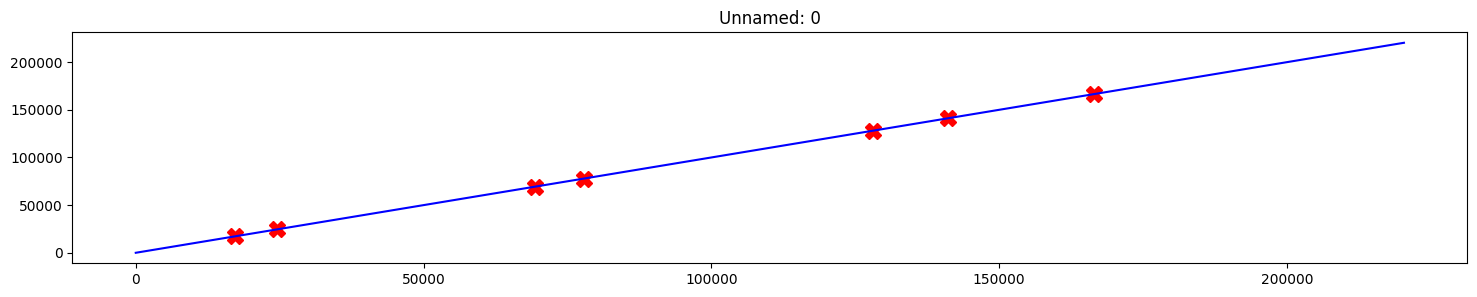

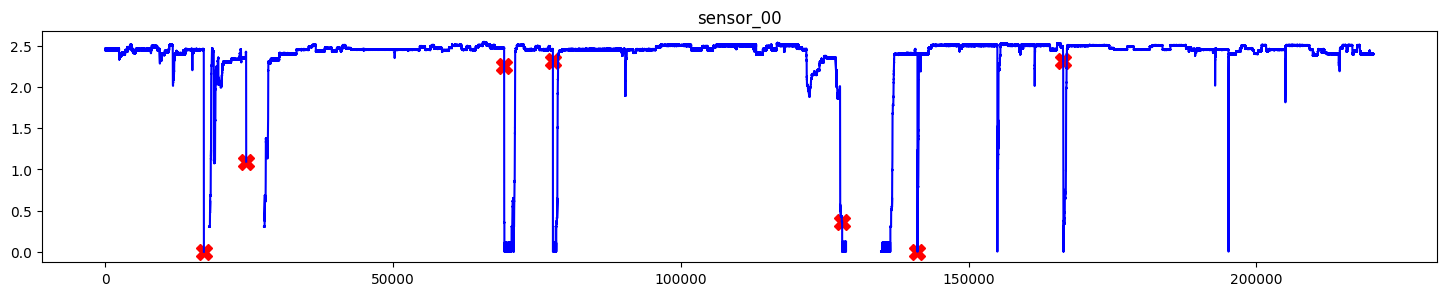

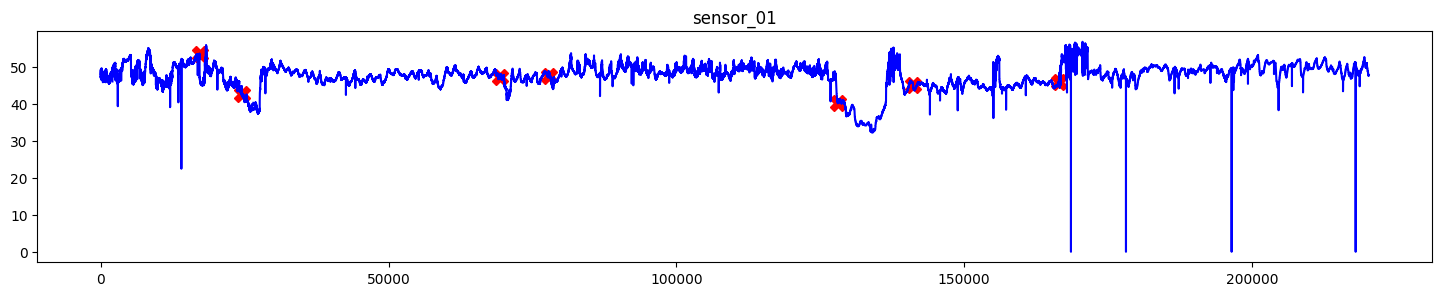

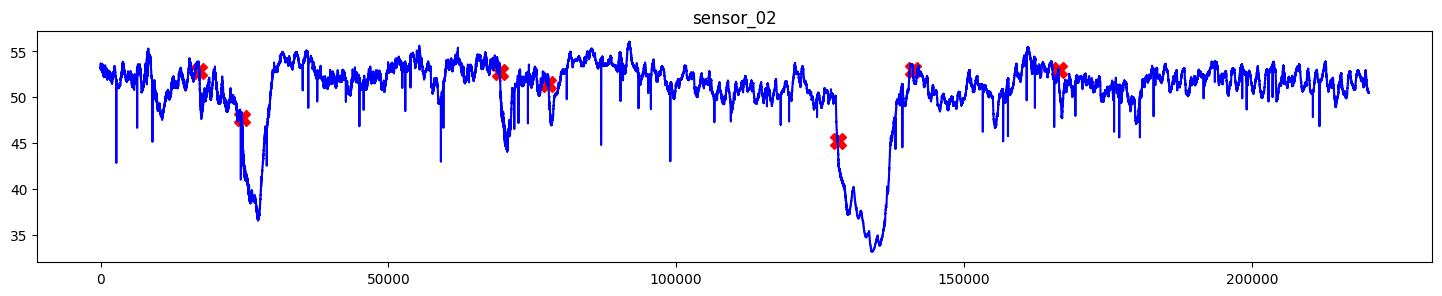

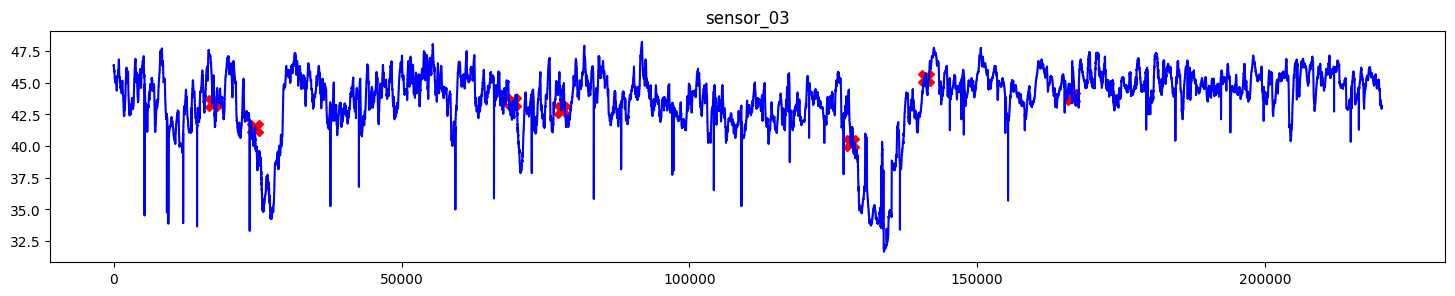

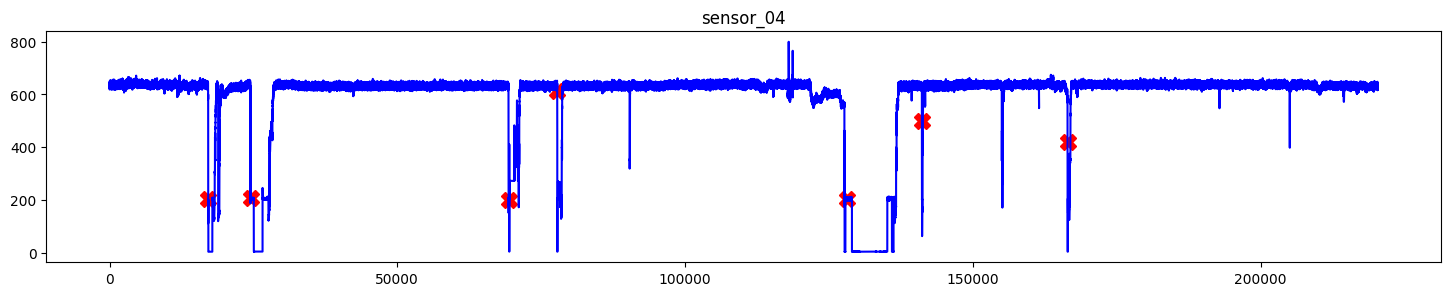

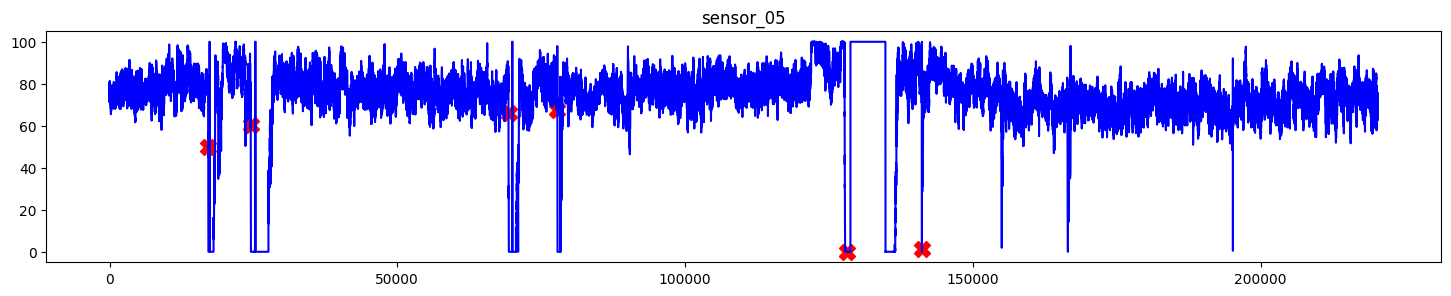

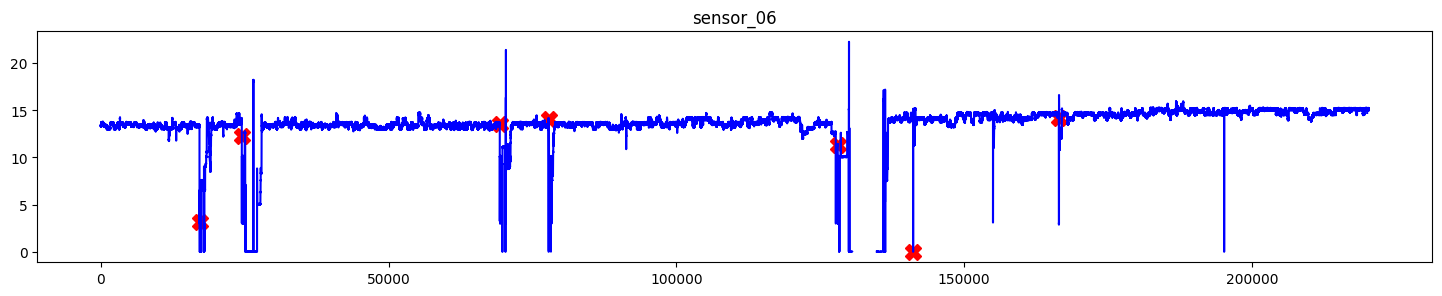

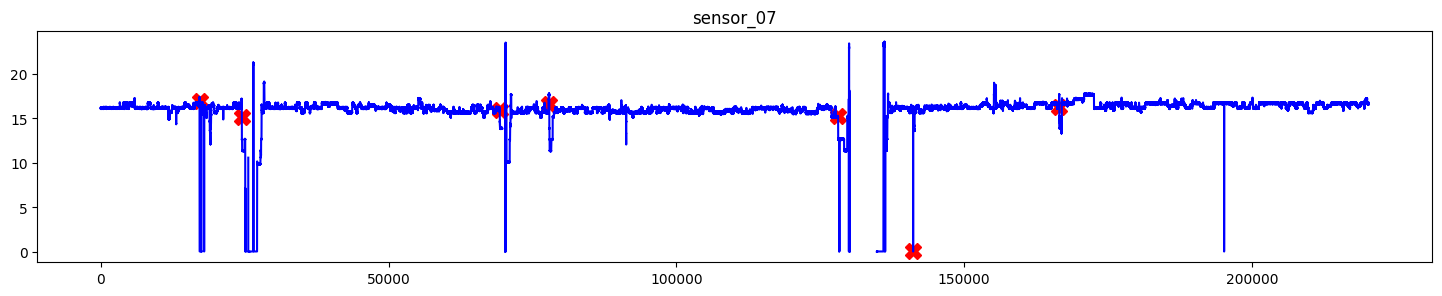

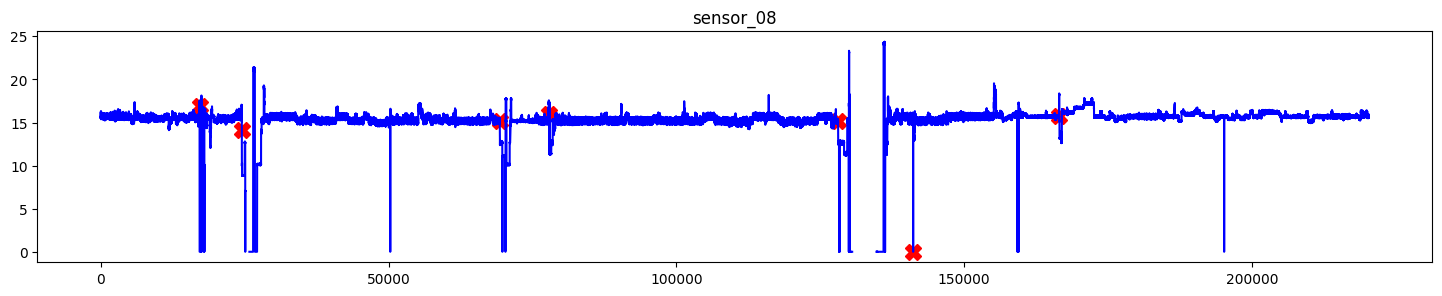

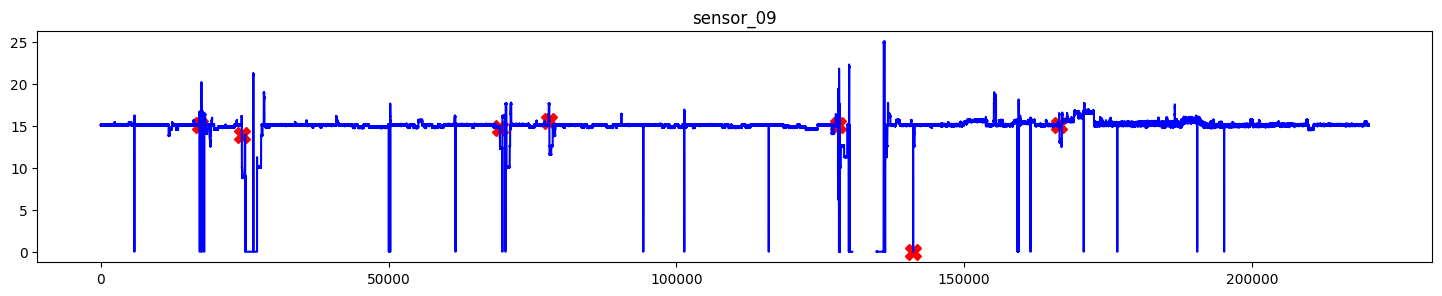

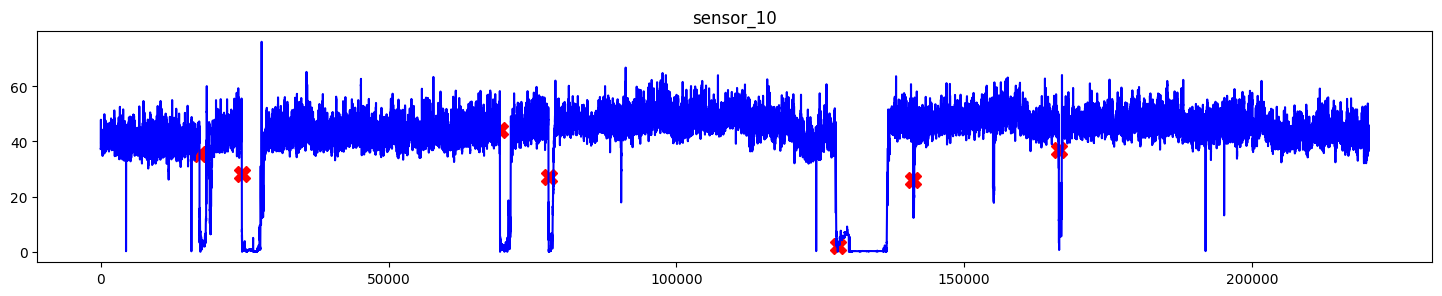

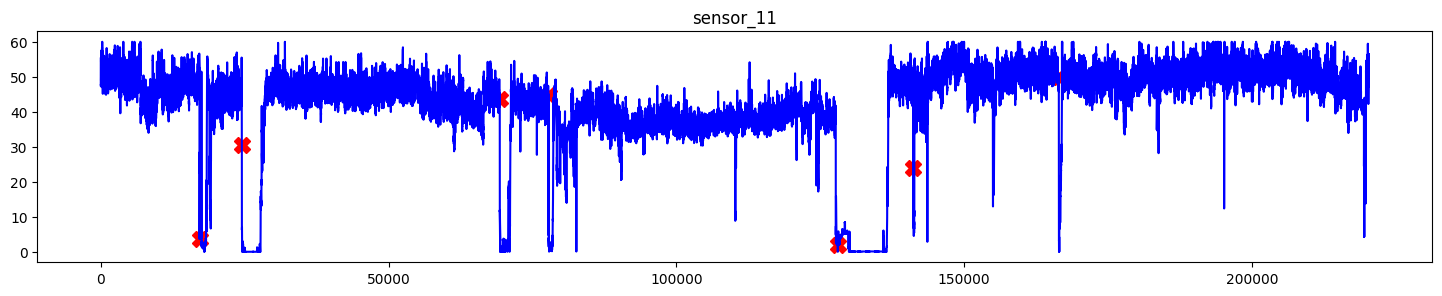

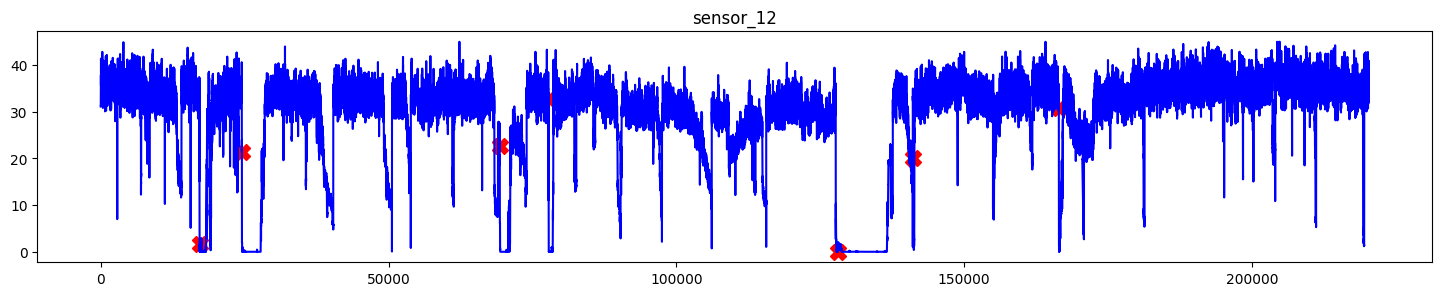

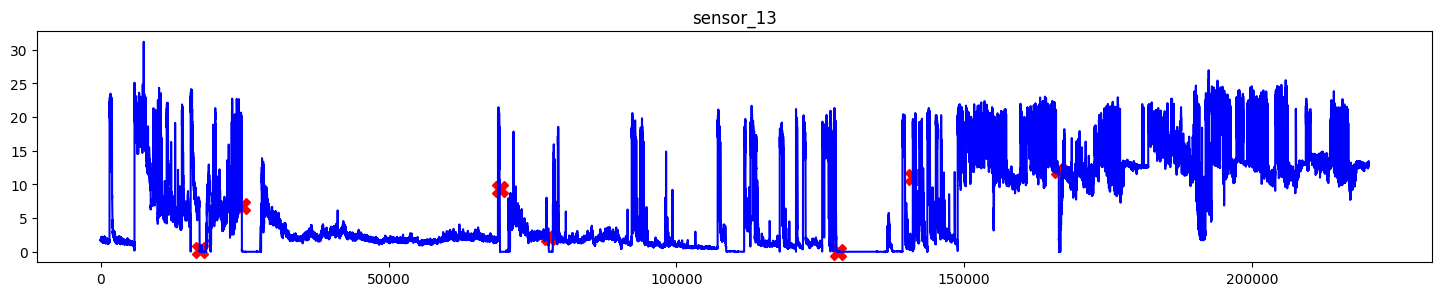

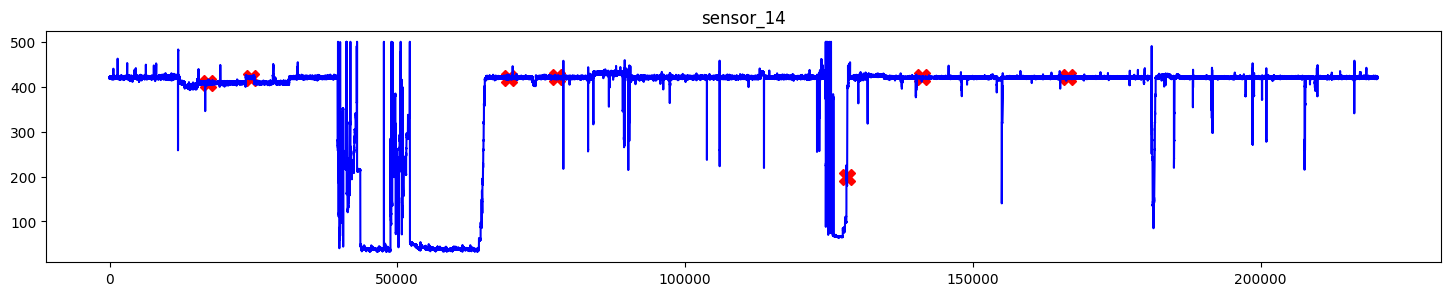

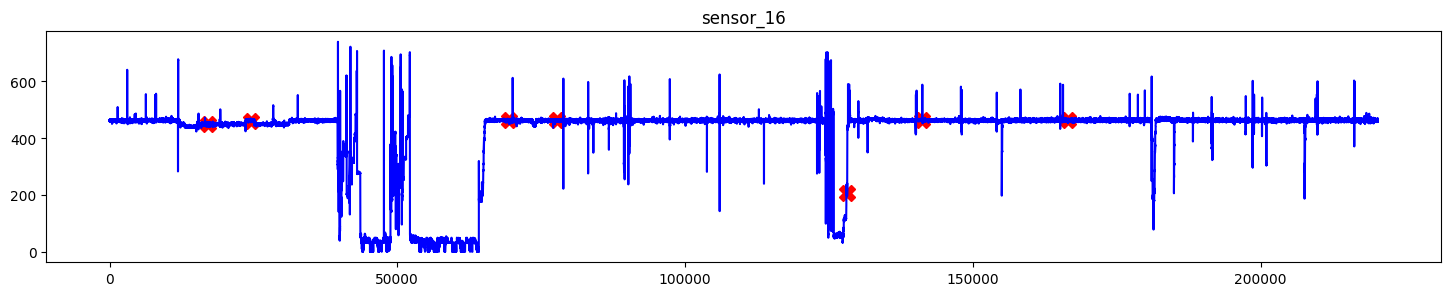

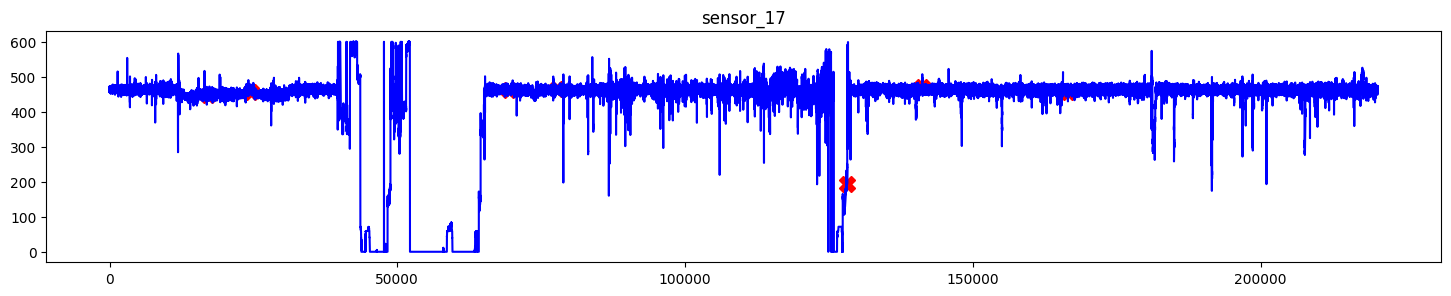

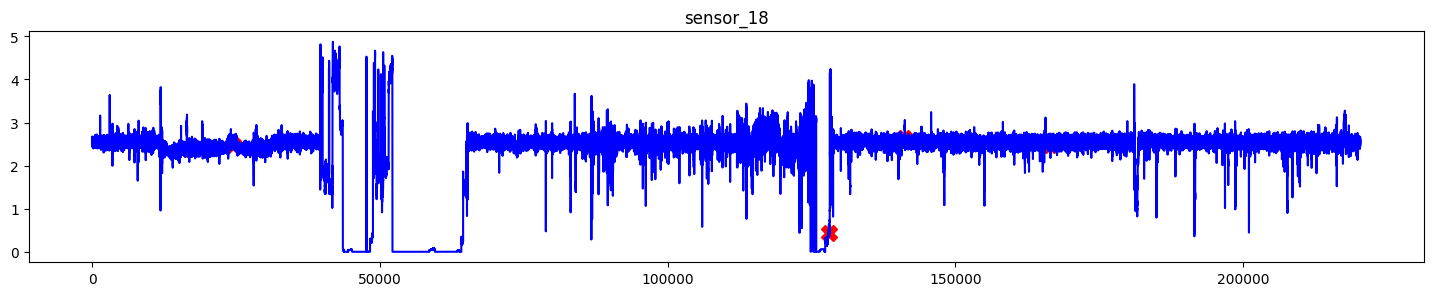

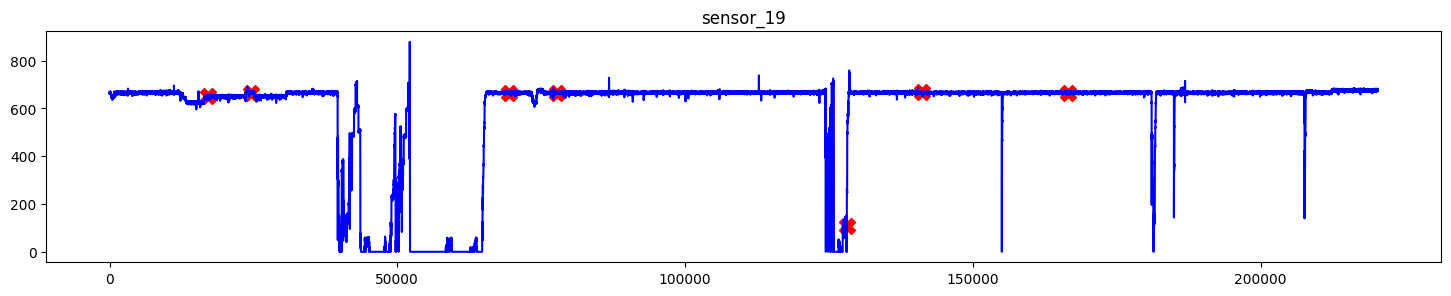

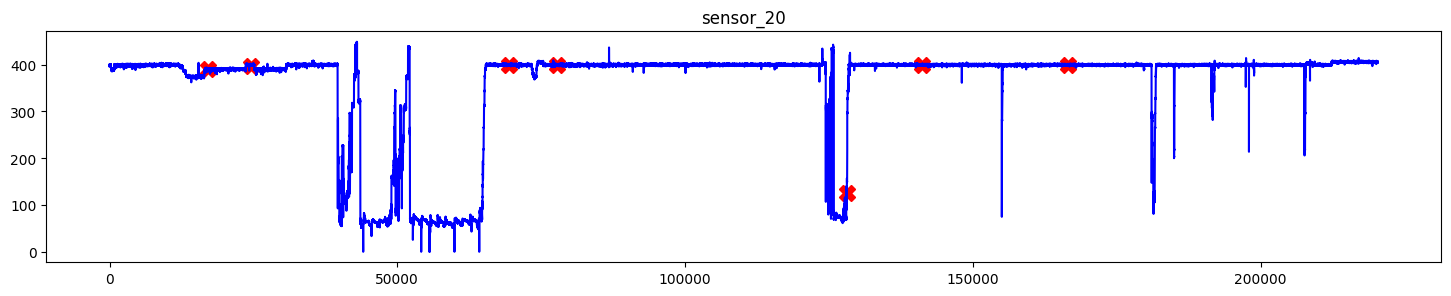

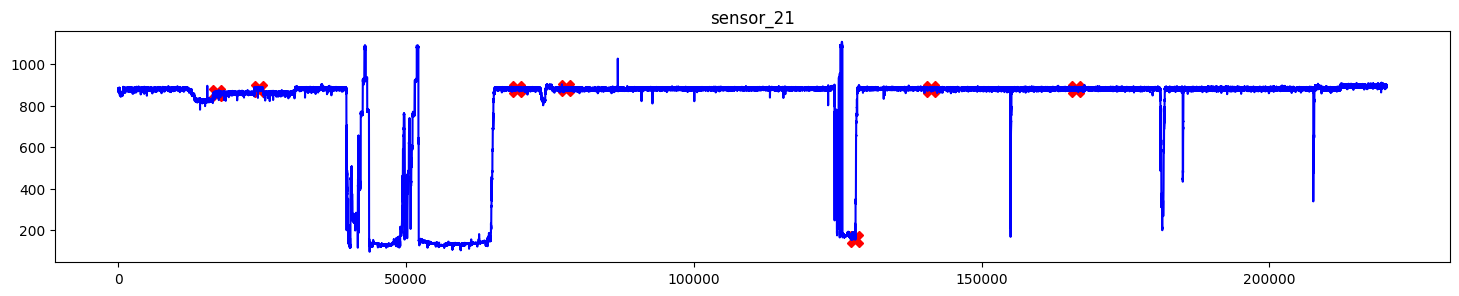

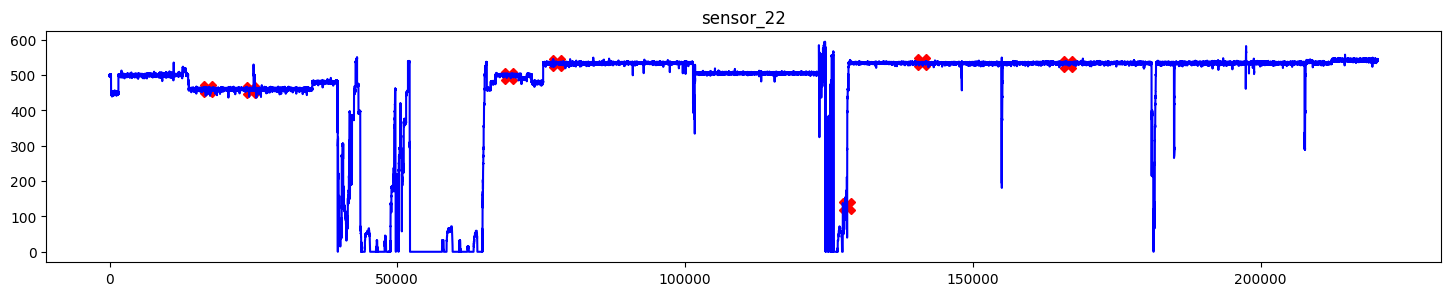

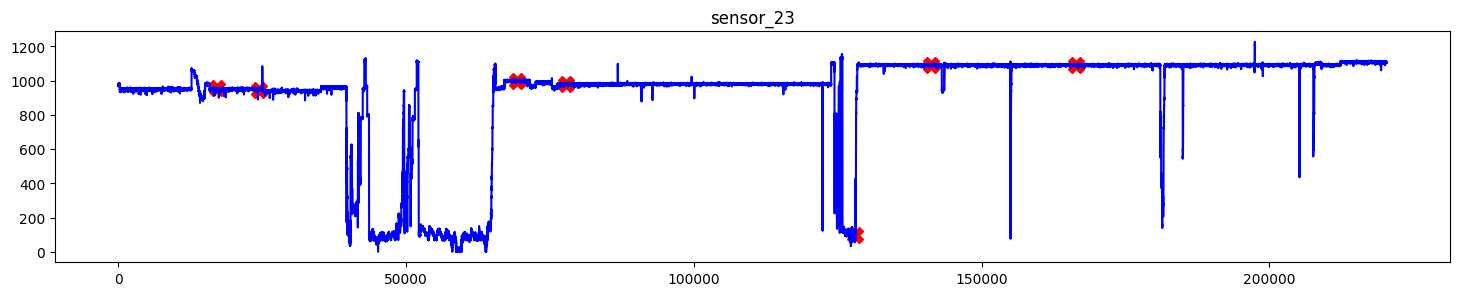

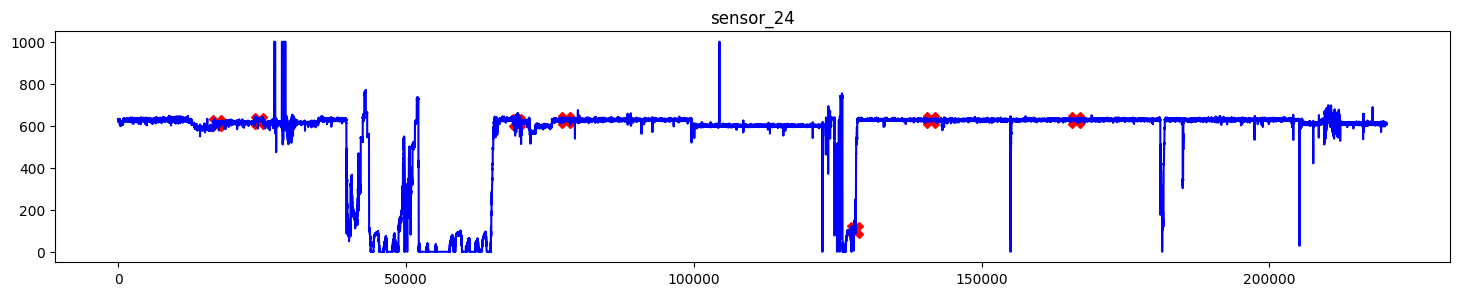

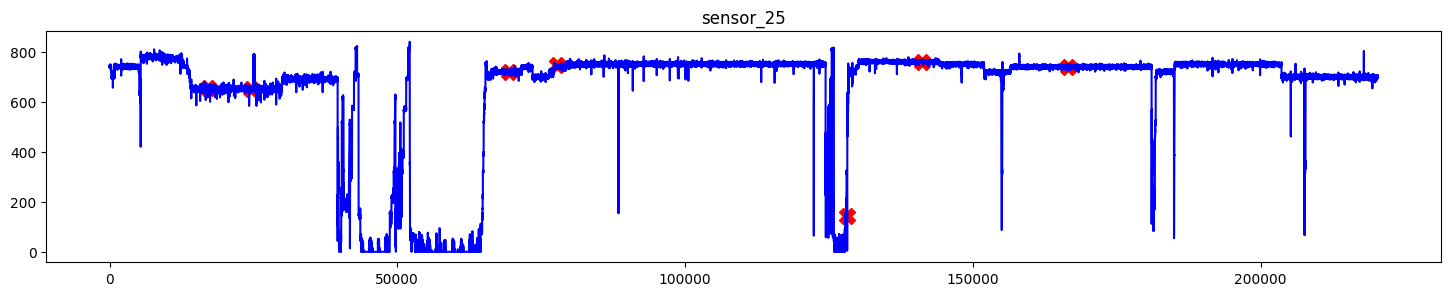

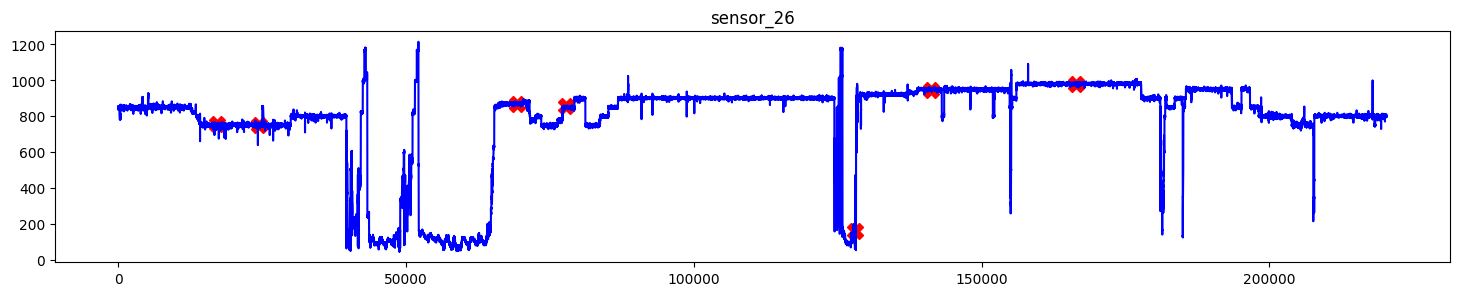

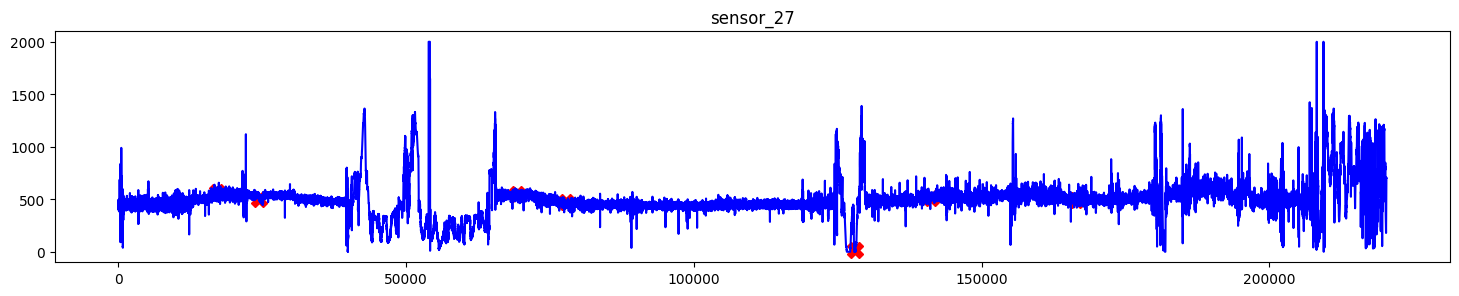

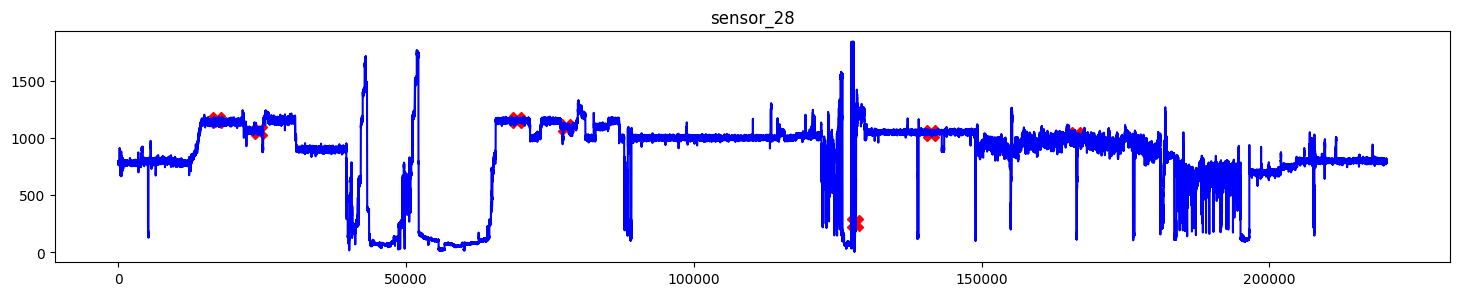

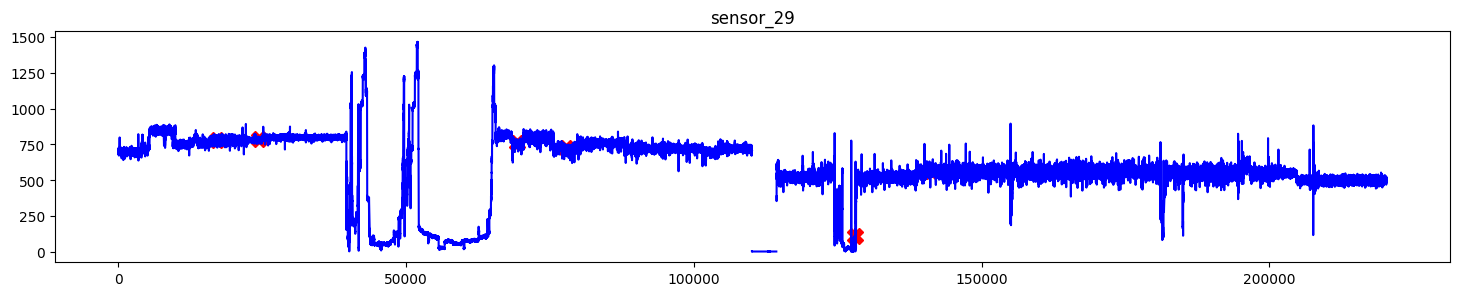

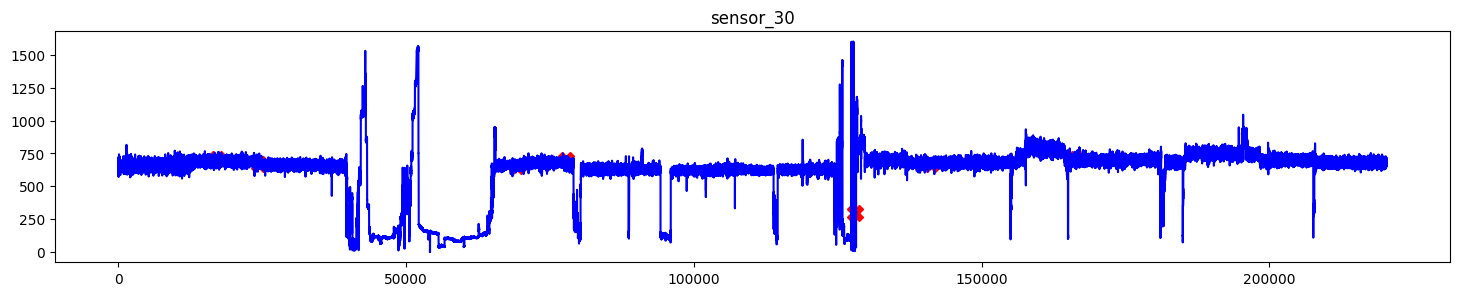

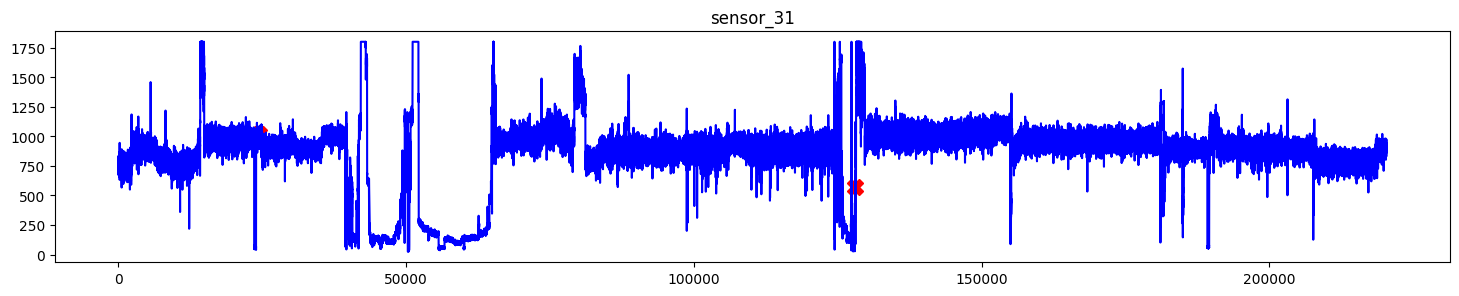

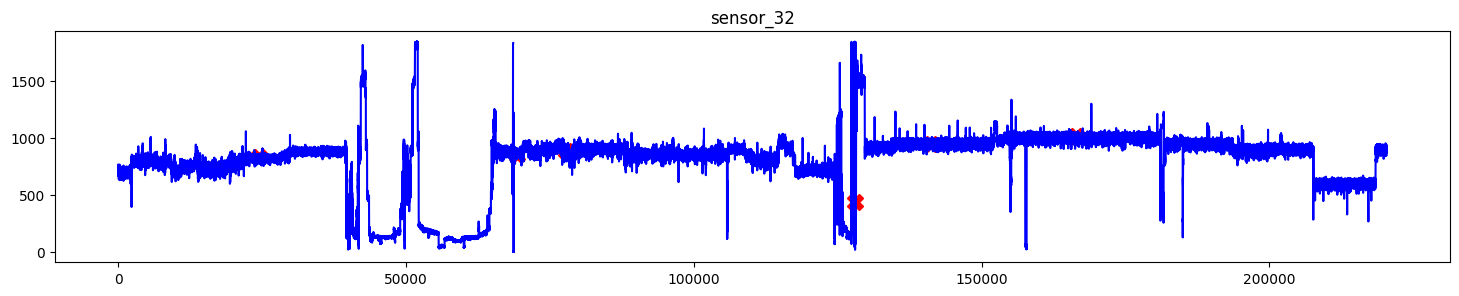

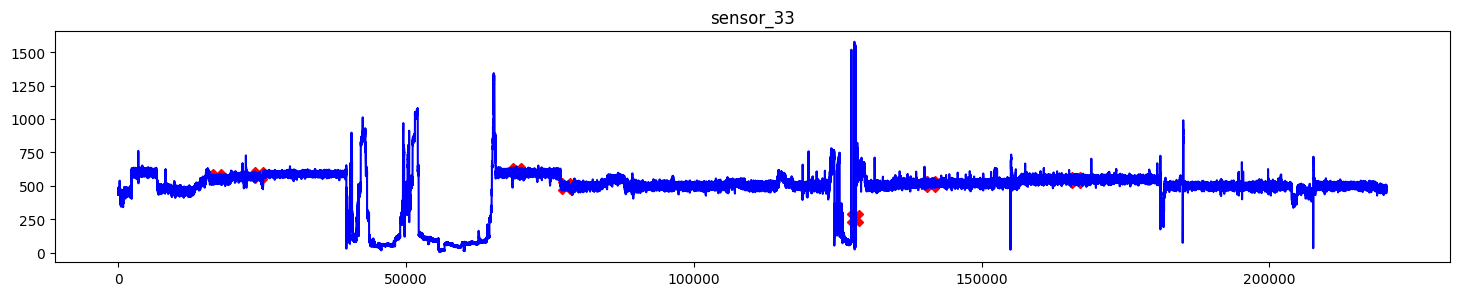

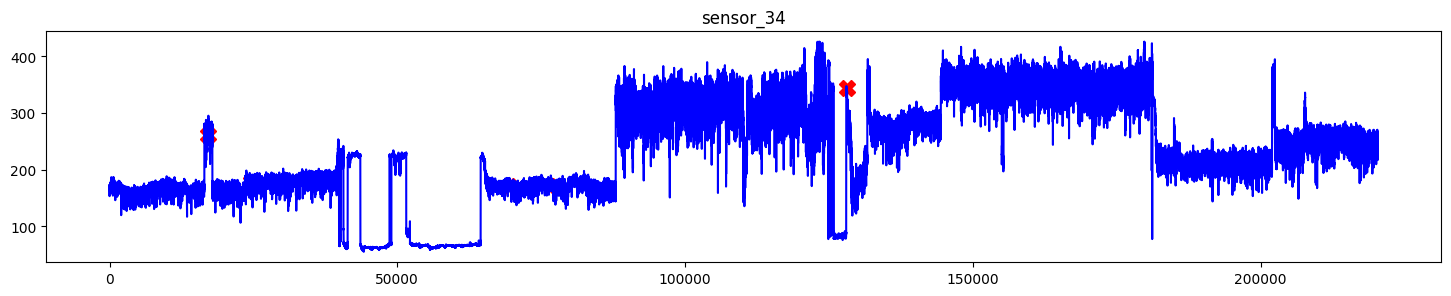

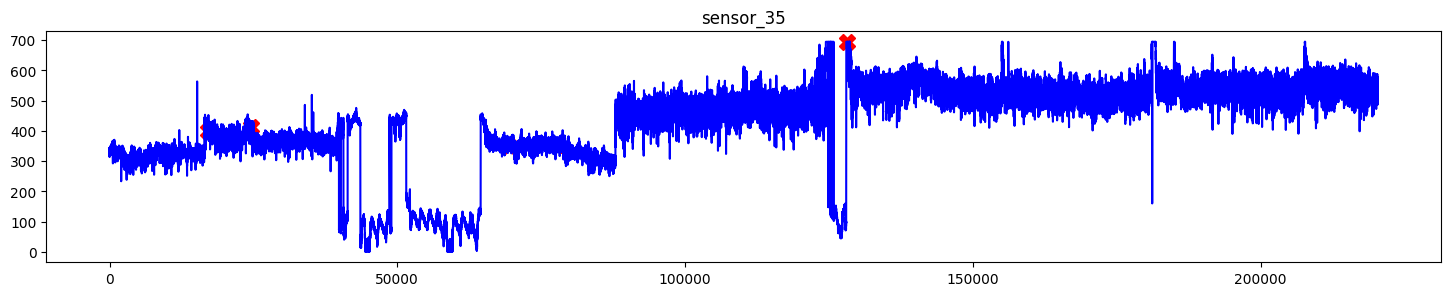

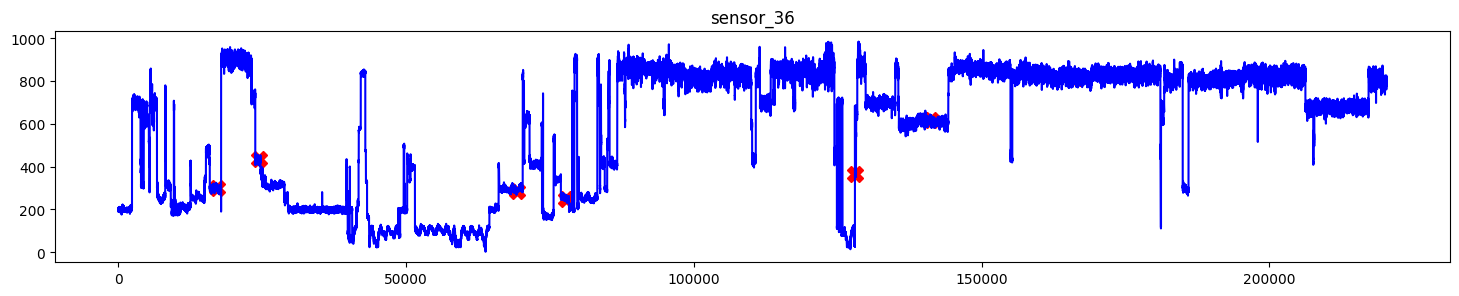

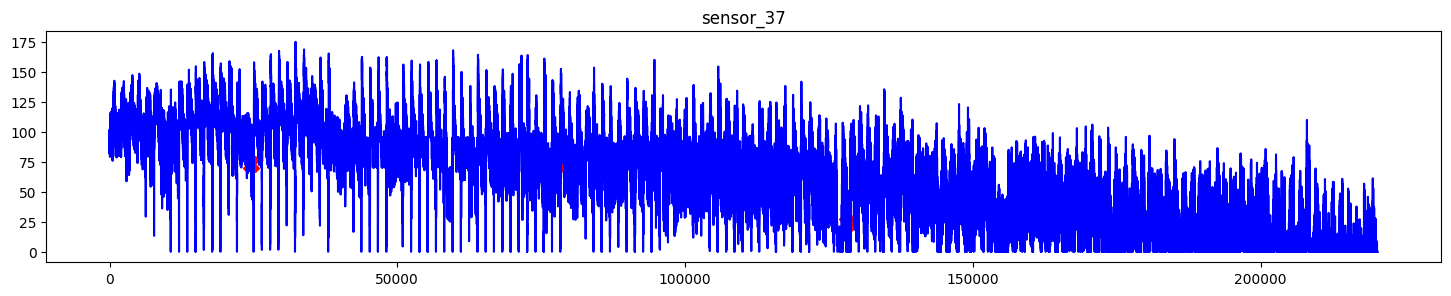

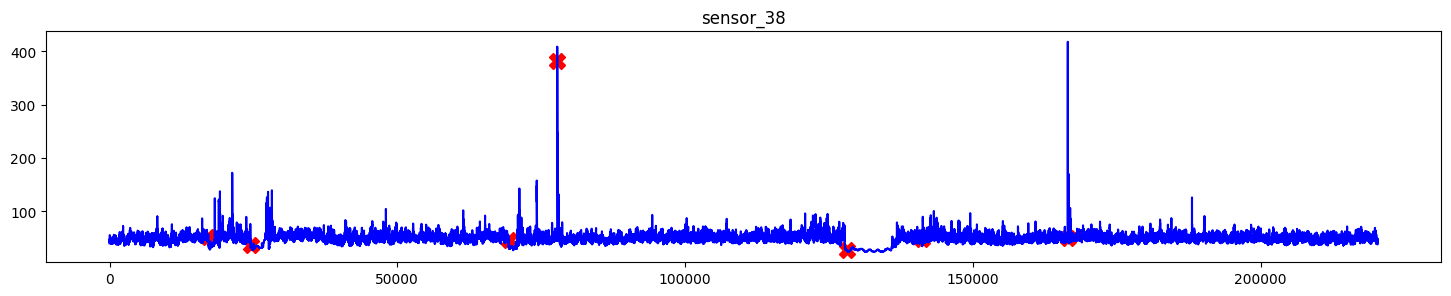

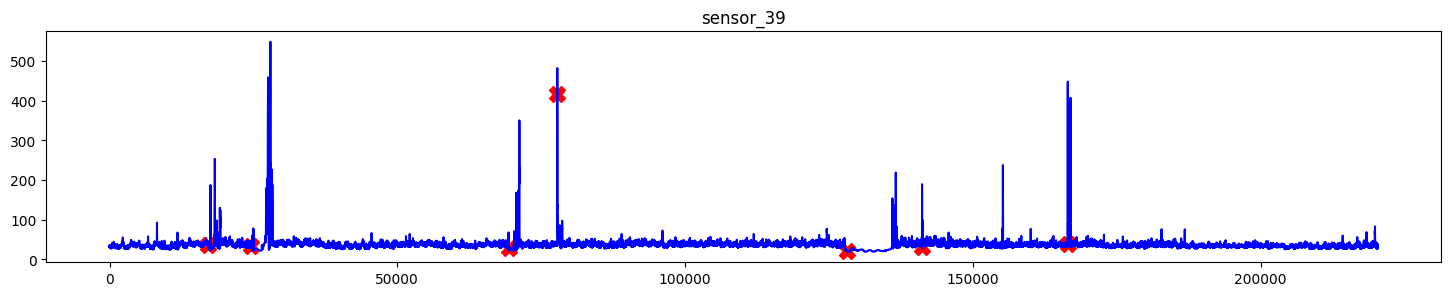

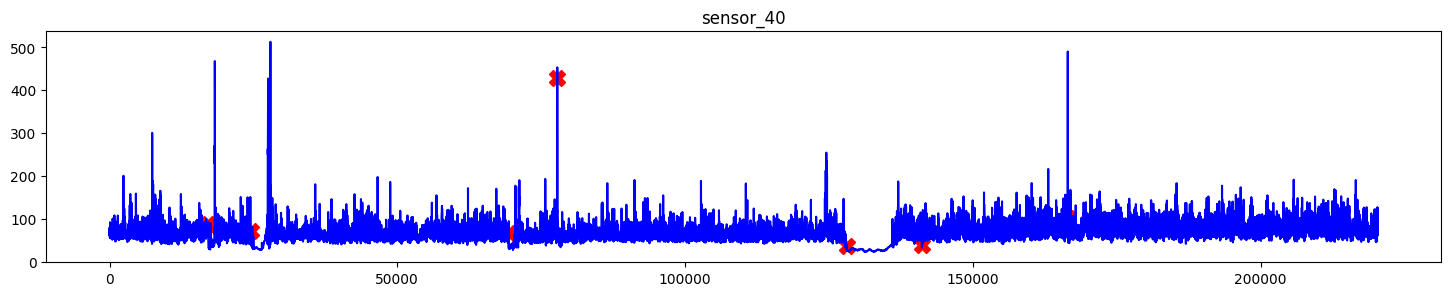

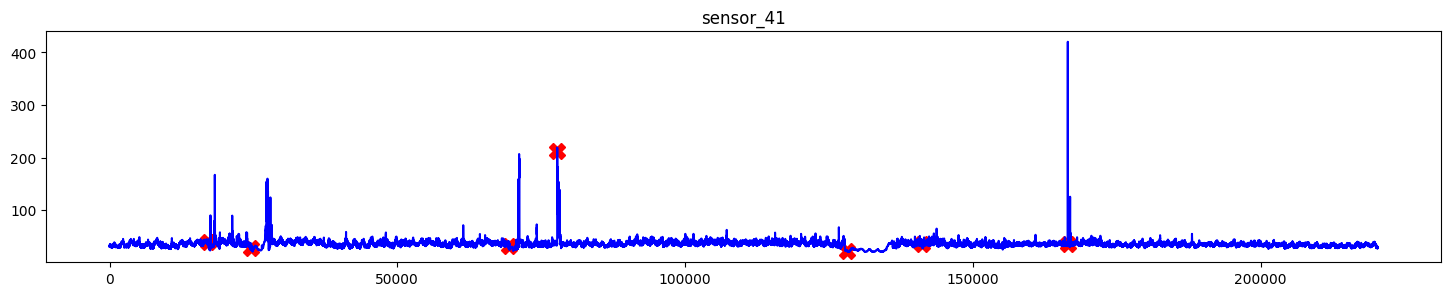

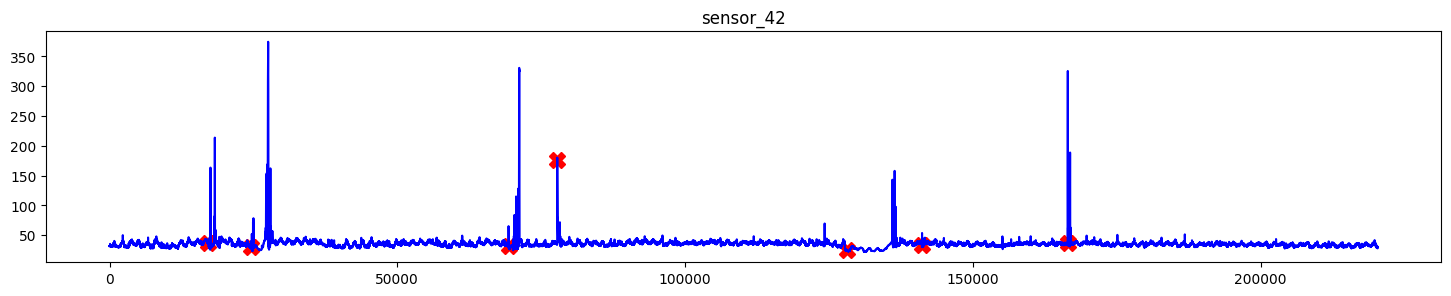

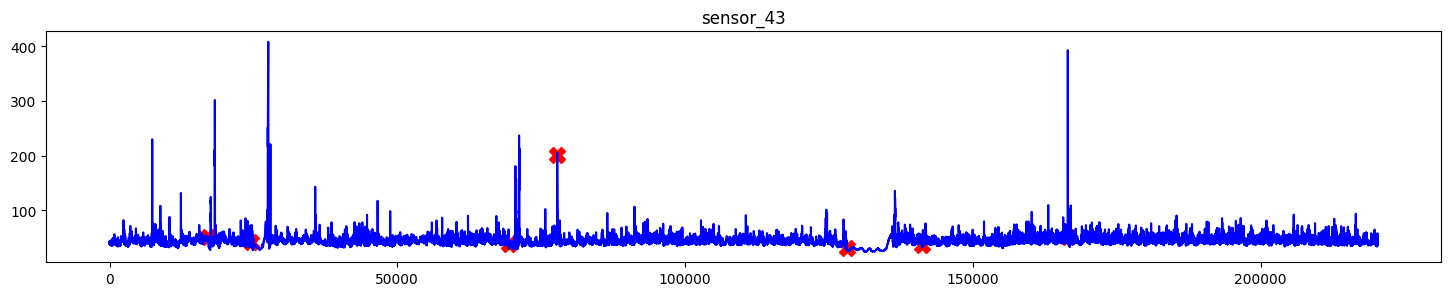

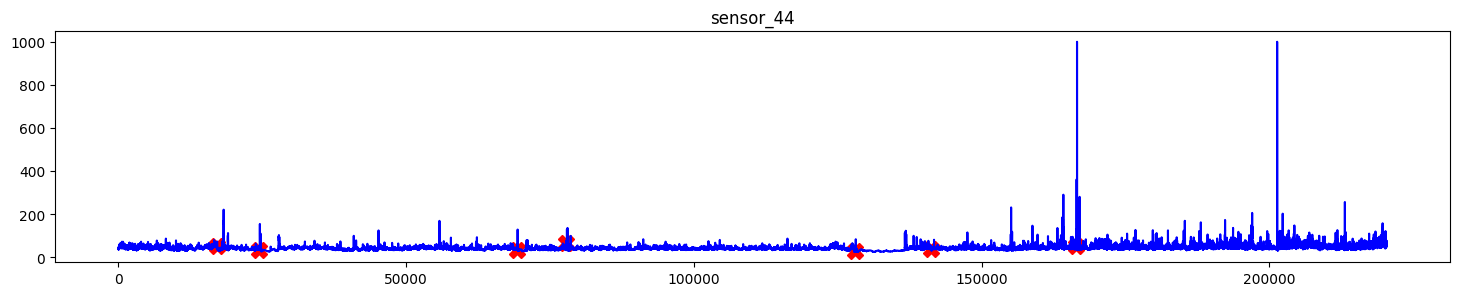

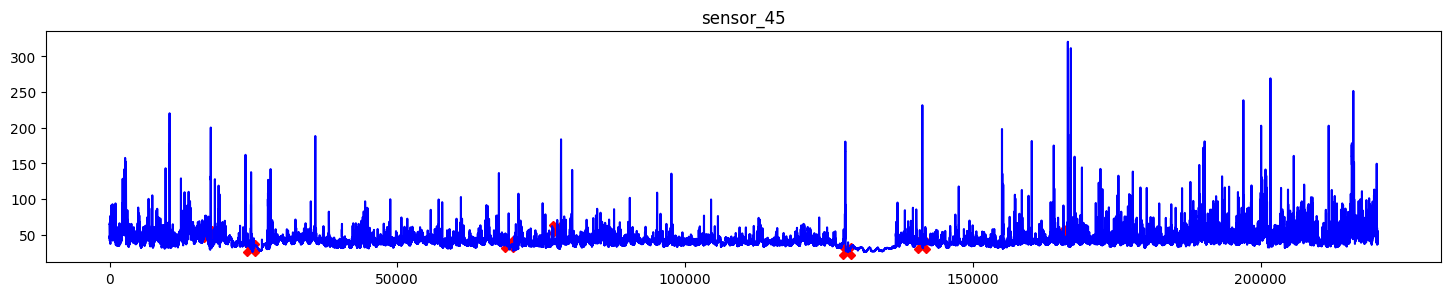

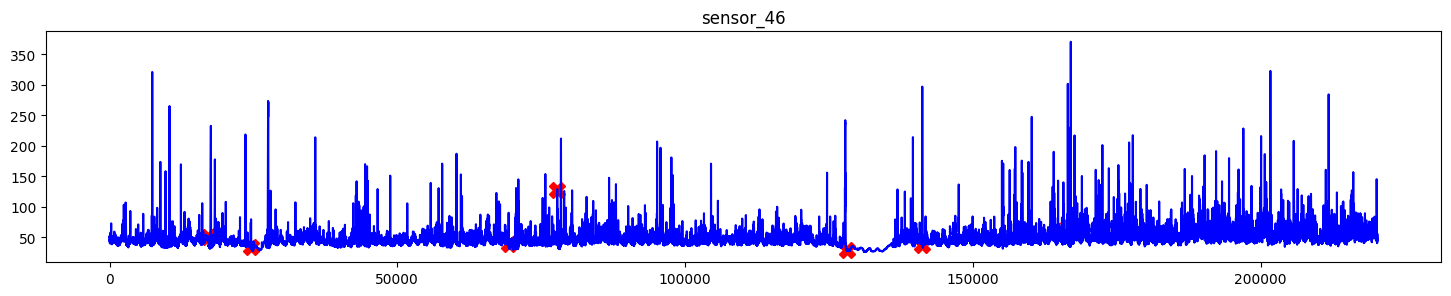

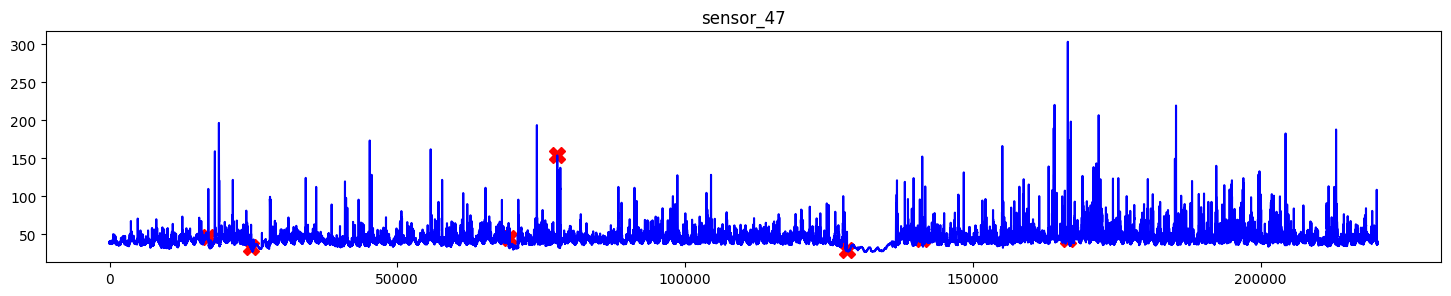

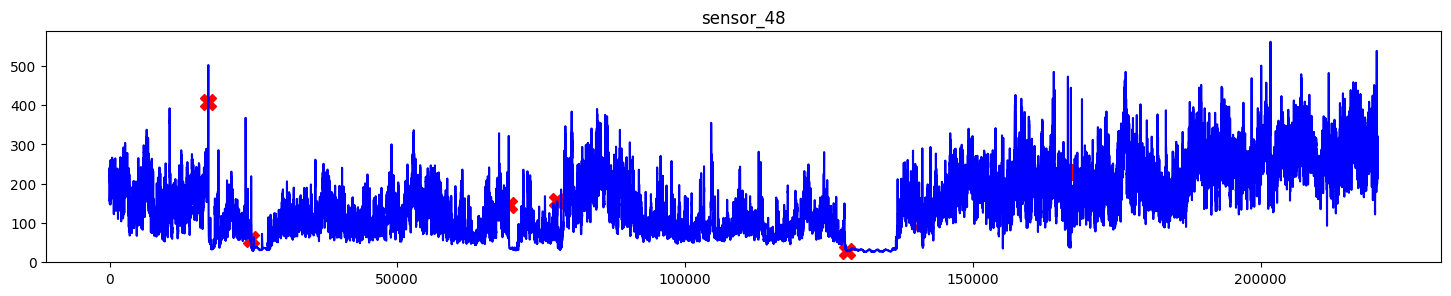

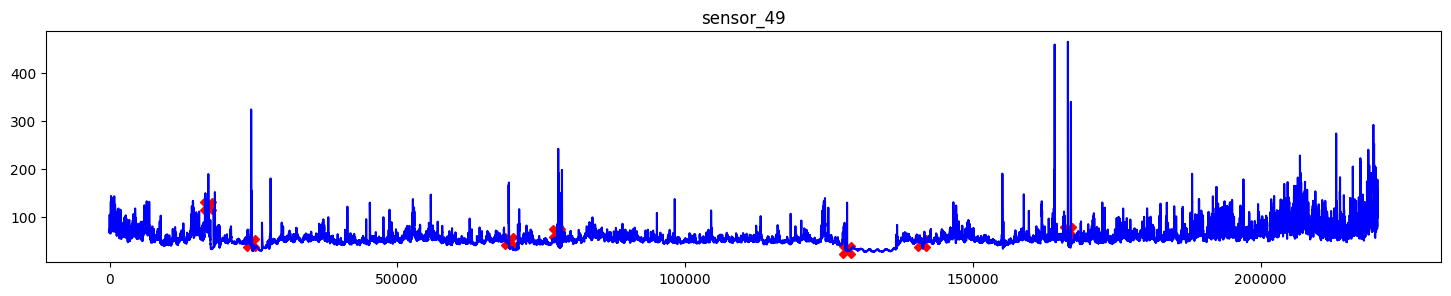

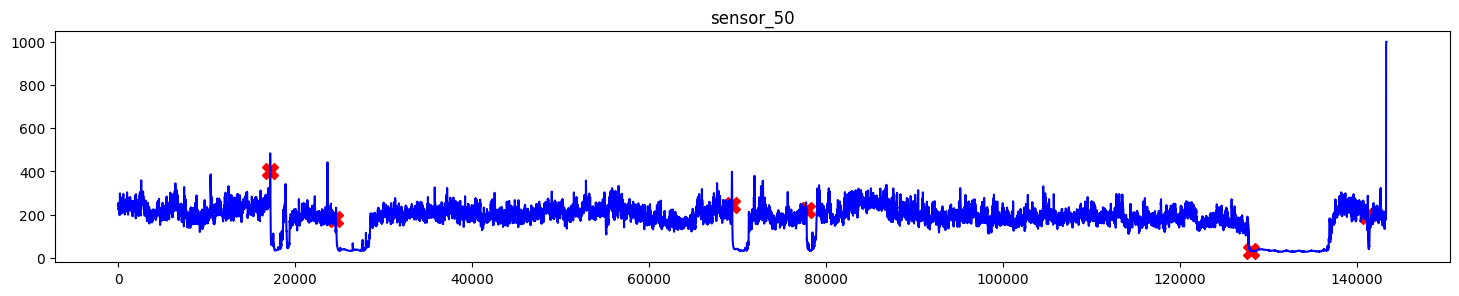

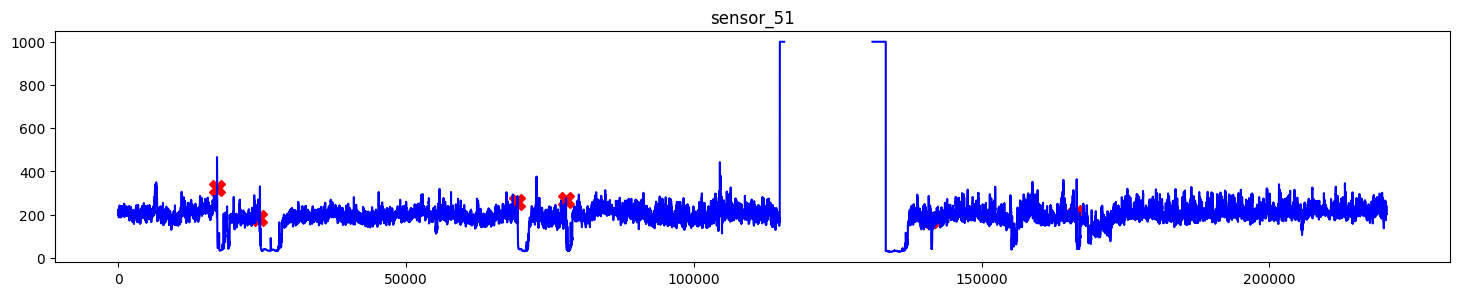

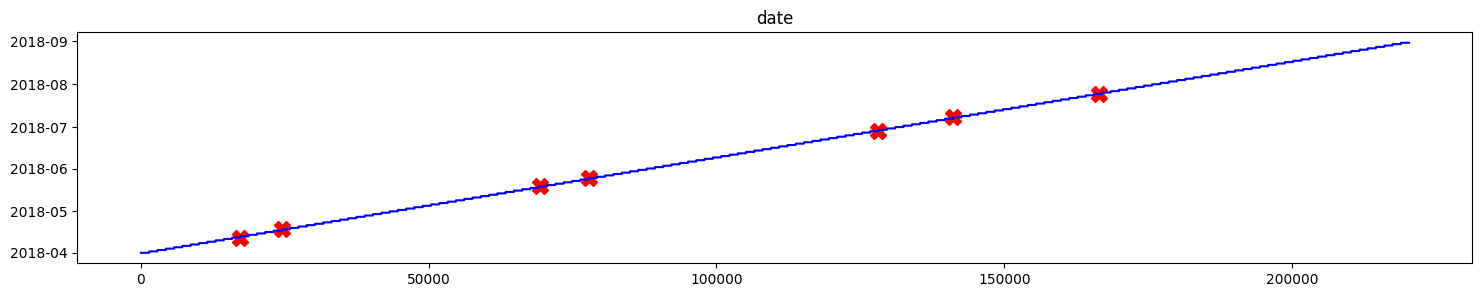

In [9]:
# Extract the readings from the BROKEN state of the pump
broken = df[df['machine_status']=='BROKEN']
# Extract the names of the numerical columns
df2 = df.drop(['machine_status'], axis=1)
names=df2.columns
# Plot time series for each sensor with BROKEN state marked with X in red color
for name in names:
    plt.figure(figsize=(18,3))
    plt.plot(broken[name], linestyle='none', marker='X', color='red', markersize=12)
    plt.plot(df[name], color='blue')
    plt.title(name)
    plt.show()

In [10]:
print(df.head())

   Unnamed: 0  sensor_00  sensor_01  sensor_02  sensor_03  sensor_04  \
0           0   2.465394   47.09201    53.2118  46.310760   634.3750   
1           1   2.465394   47.09201    53.2118  46.310760   634.3750   
2           2   2.444734   47.35243    53.2118  46.397570   638.8889   
3           3   2.460474   47.09201    53.1684  46.397568   628.1250   
4           4   2.445718   47.13541    53.2118  46.397568   636.4583   

   sensor_05  sensor_06  sensor_07  sensor_08  ...  sensor_44  sensor_45  \
0   76.45975   13.41146   16.13136   15.56713  ...  39.641200   65.68287   
1   76.45975   13.41146   16.13136   15.56713  ...  39.641200   65.68287   
2   73.54598   13.32465   16.03733   15.61777  ...  39.351852   65.39352   
3   76.98898   13.31742   16.24711   15.69734  ...  39.062500   64.81481   
4   76.58897   13.35359   16.21094   15.69734  ...  38.773150   65.10416   

   sensor_46  sensor_47  sensor_48  sensor_49  sensor_50  sensor_51  \
0   50.92593  38.194440   157.9861   67

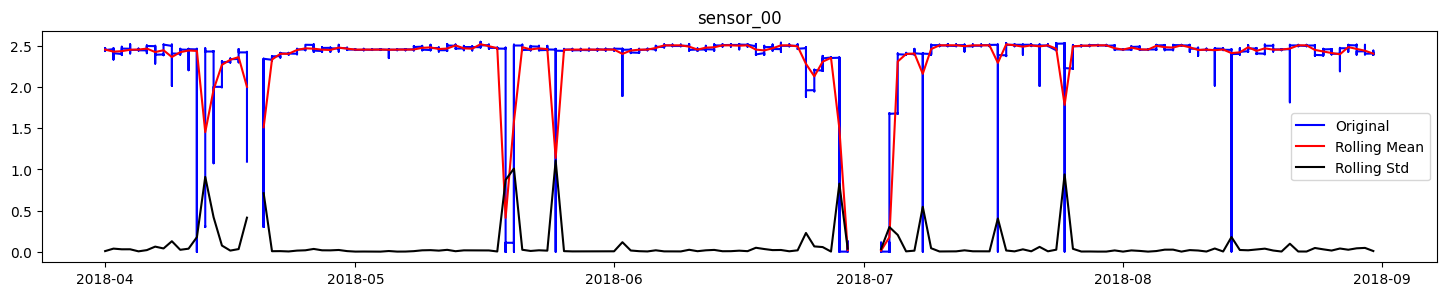

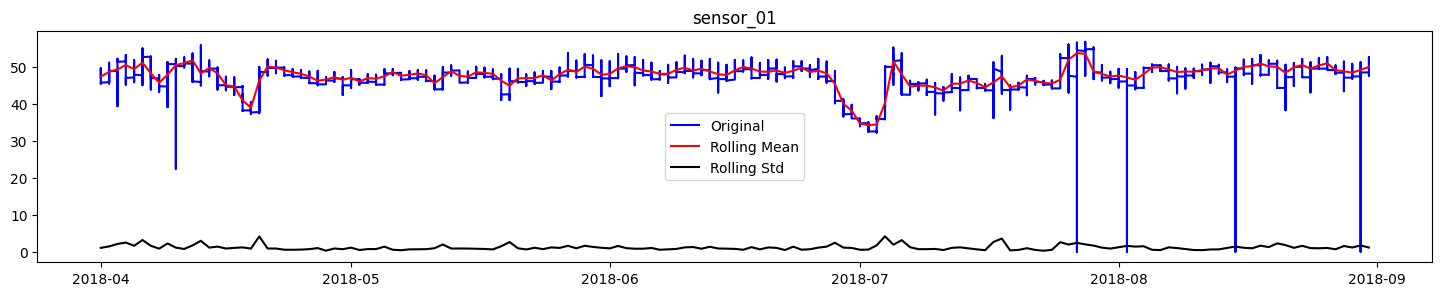

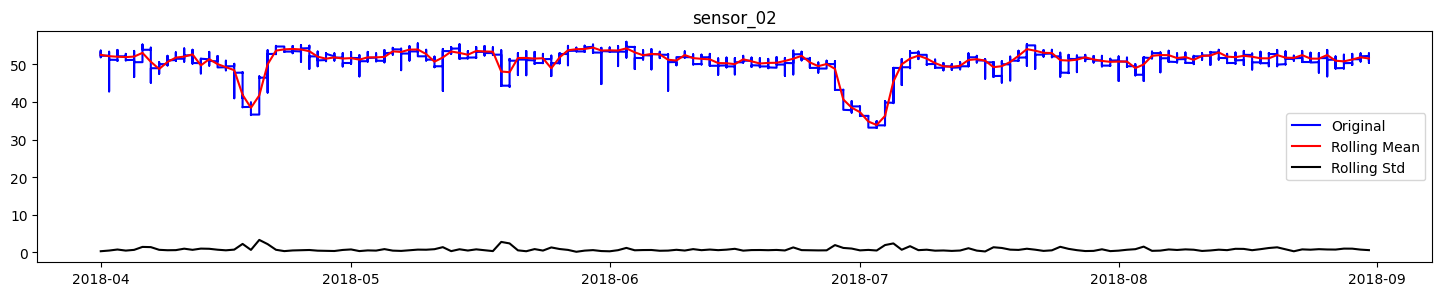

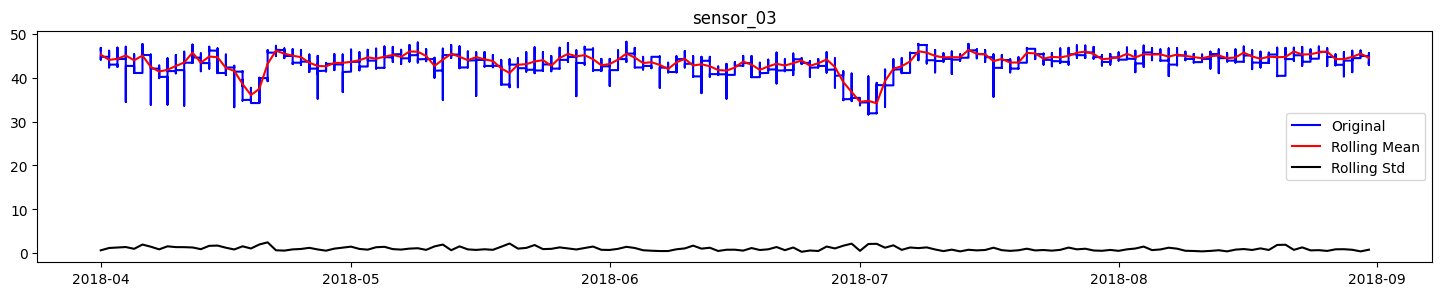

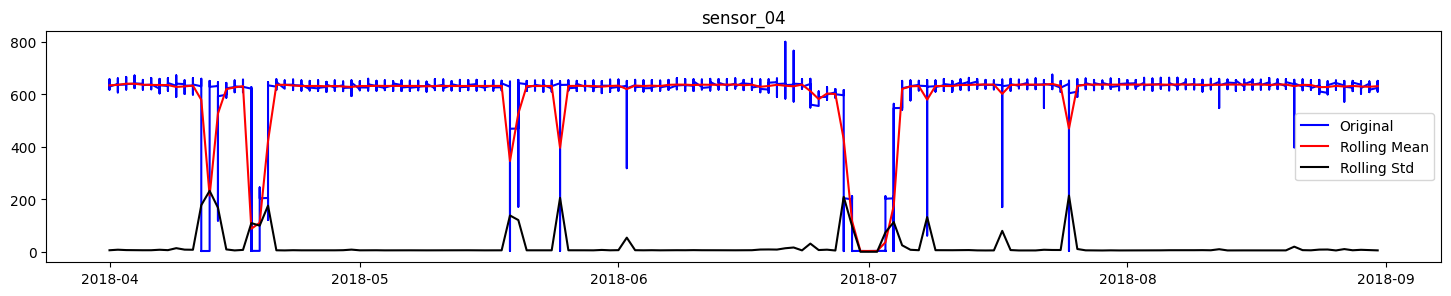

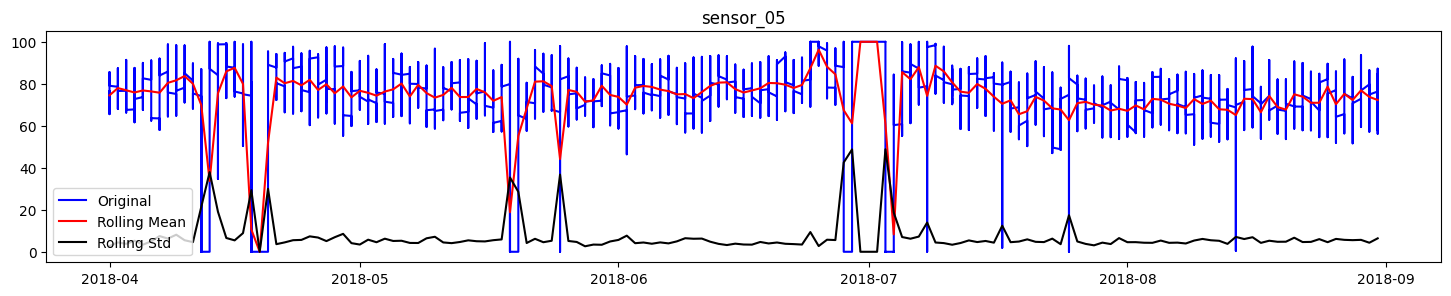

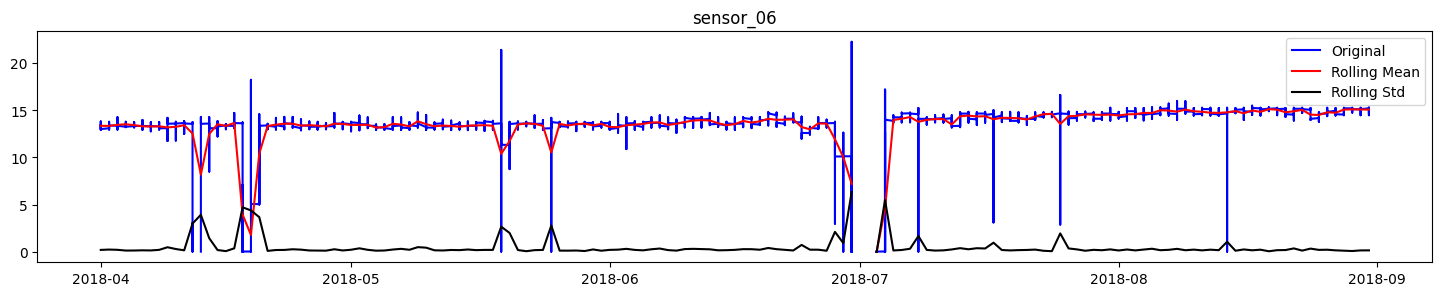

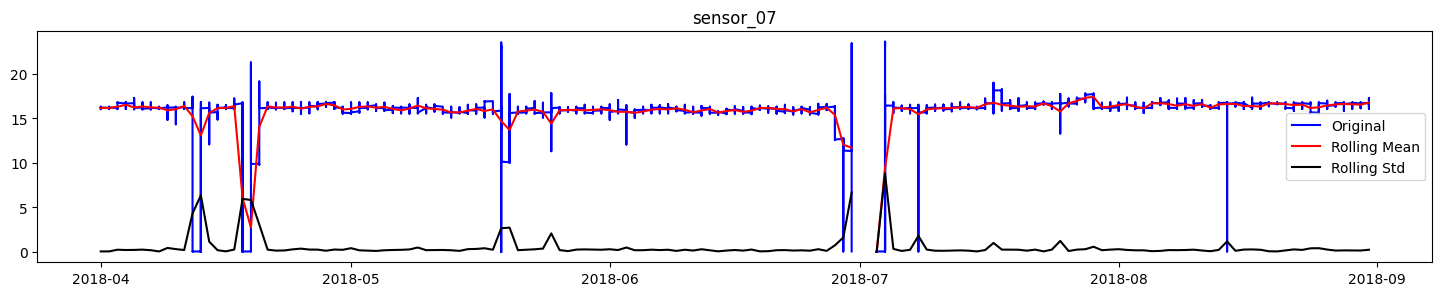

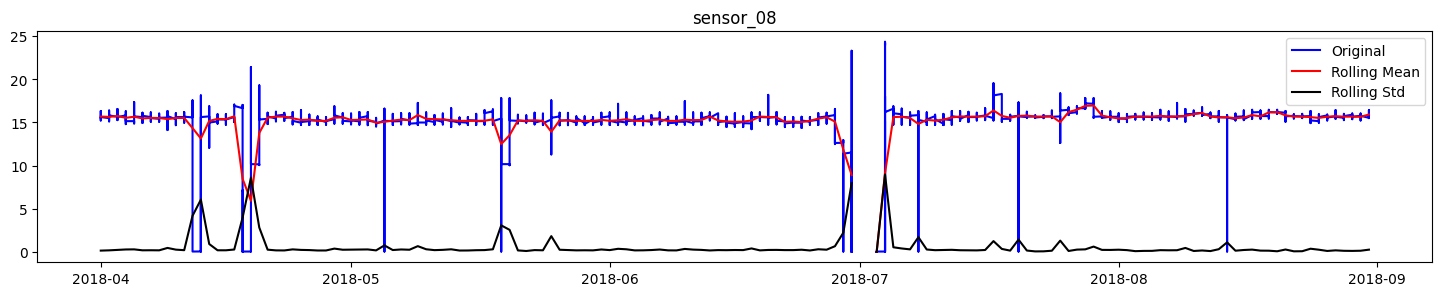

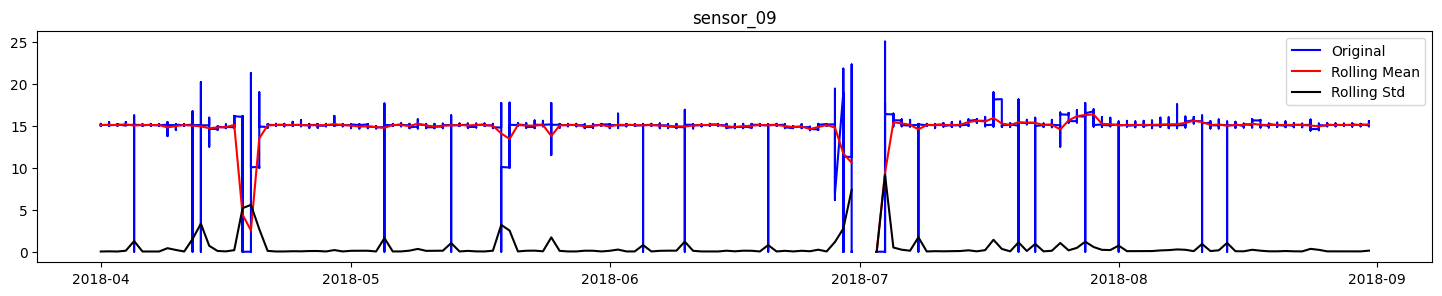

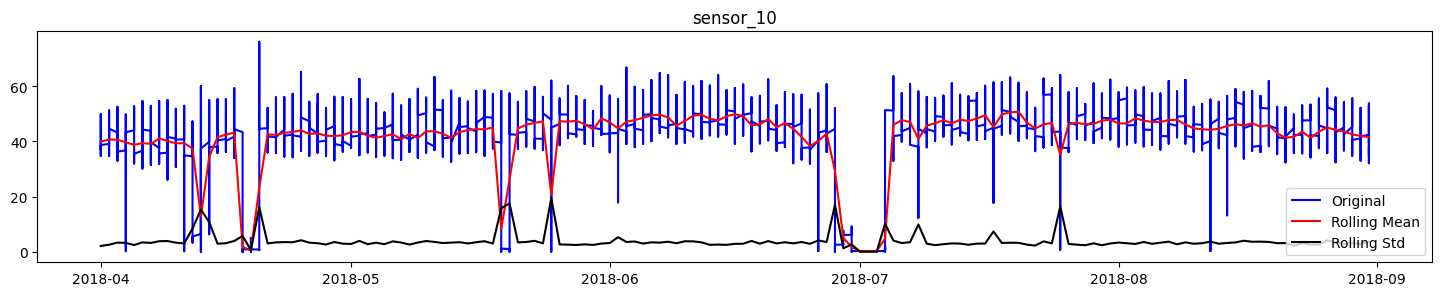

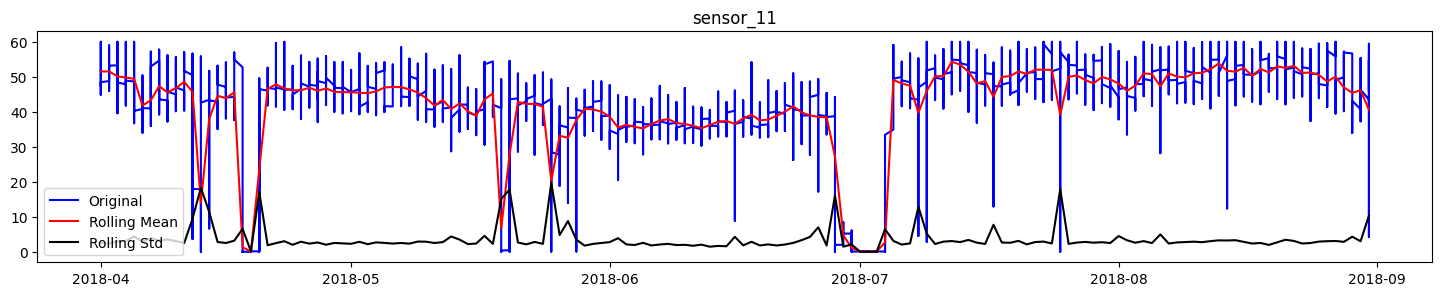

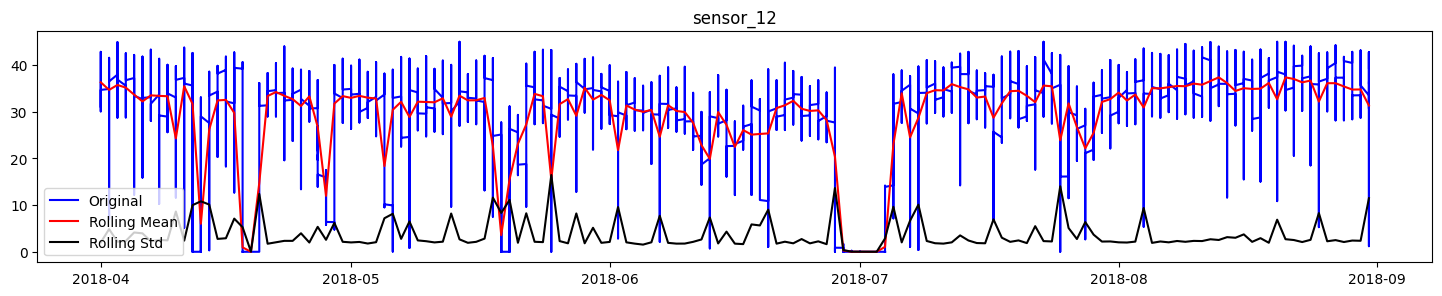

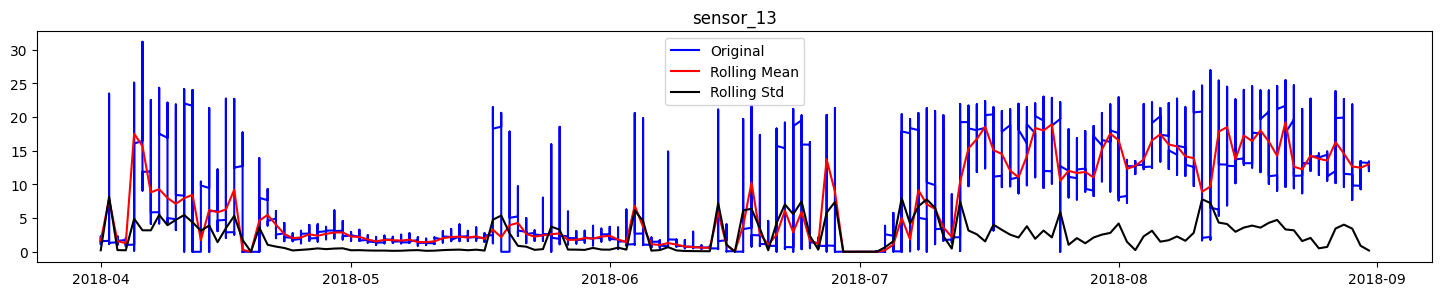

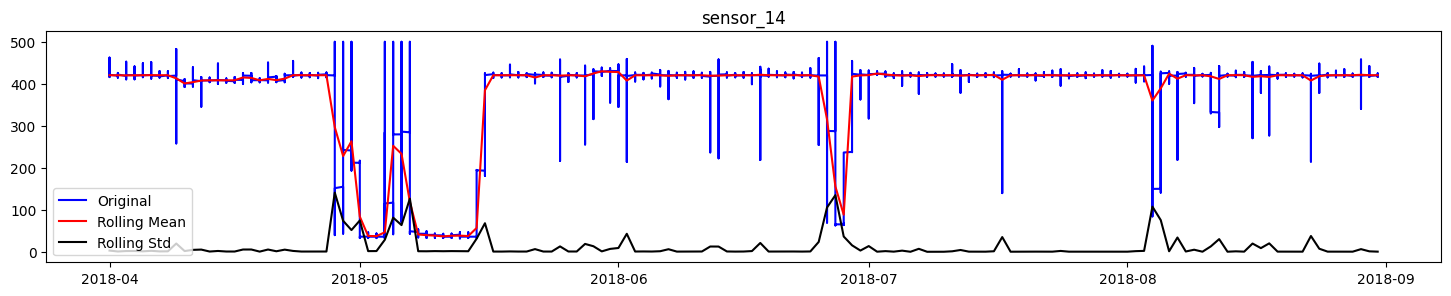

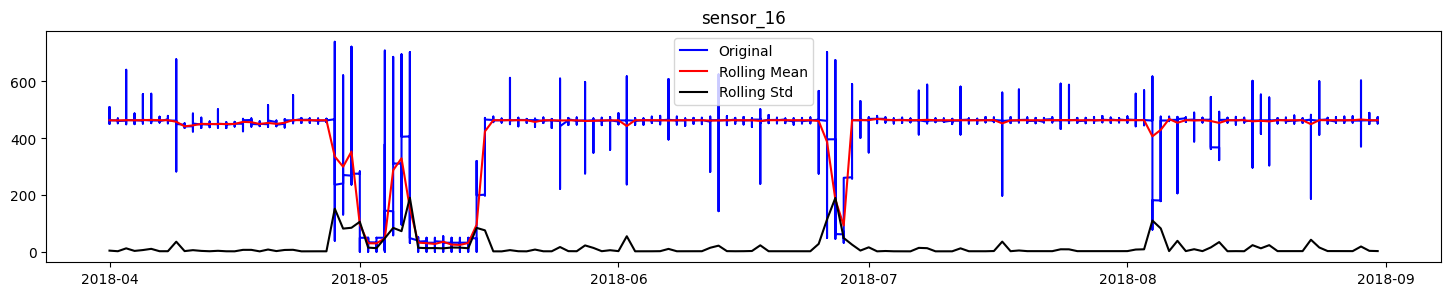

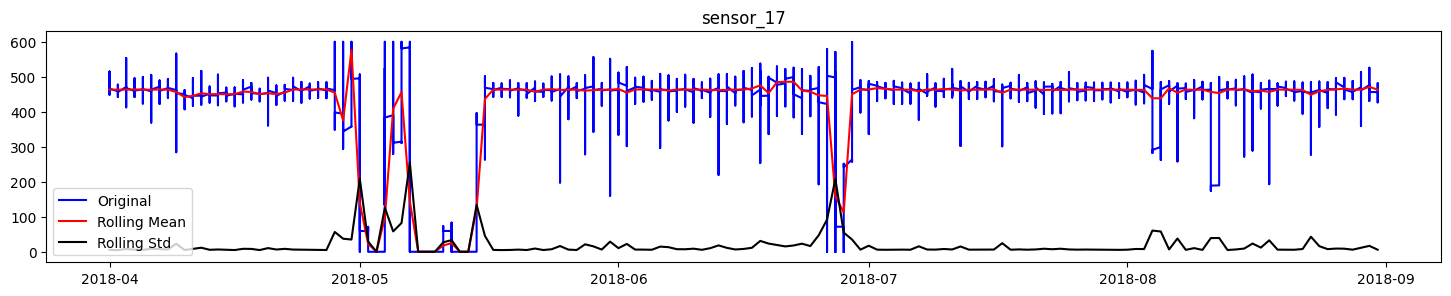

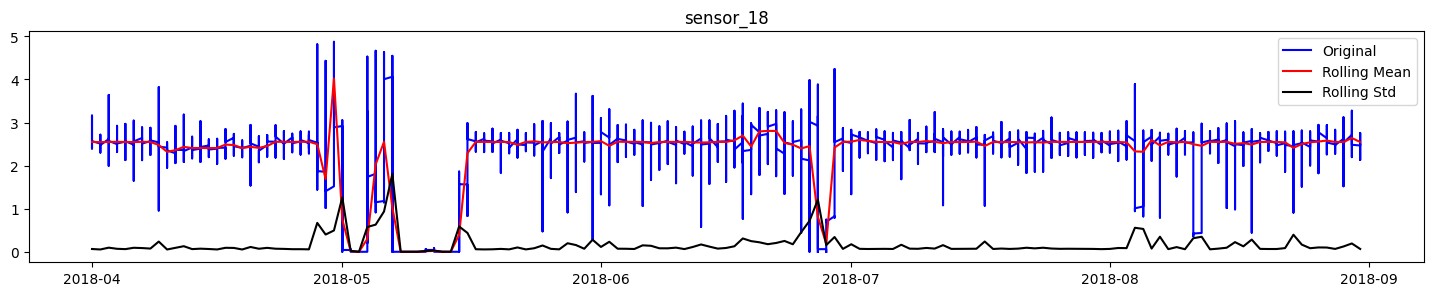

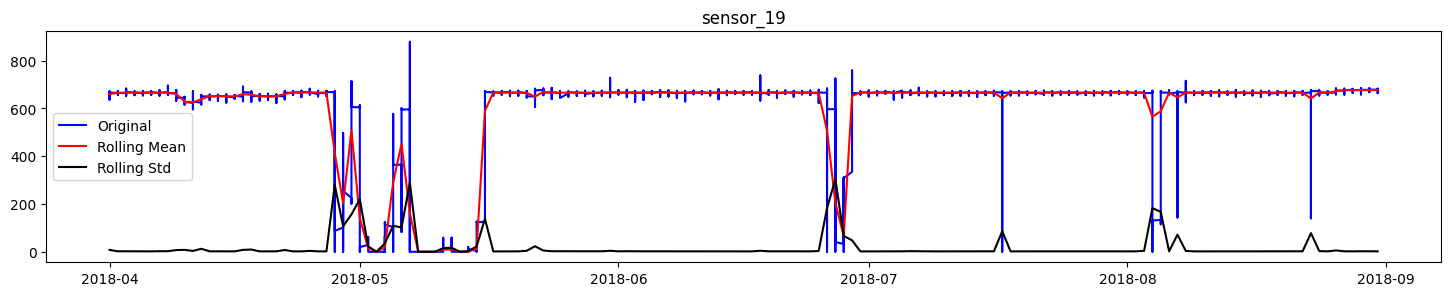

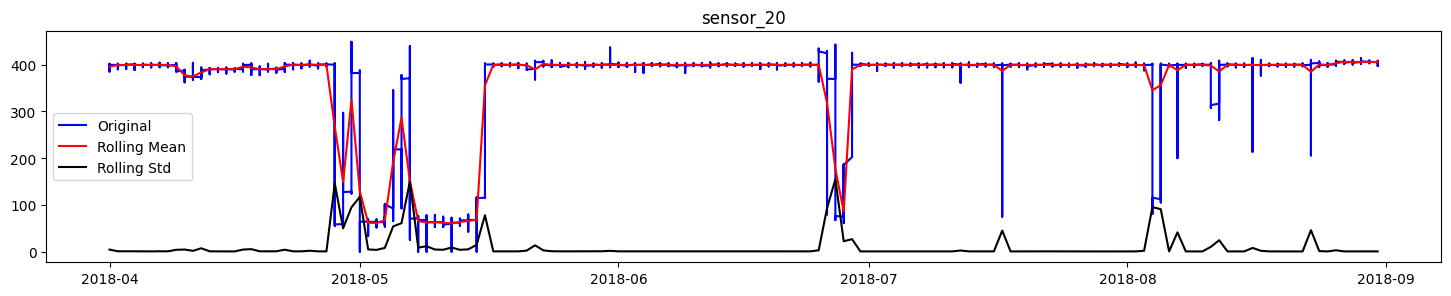

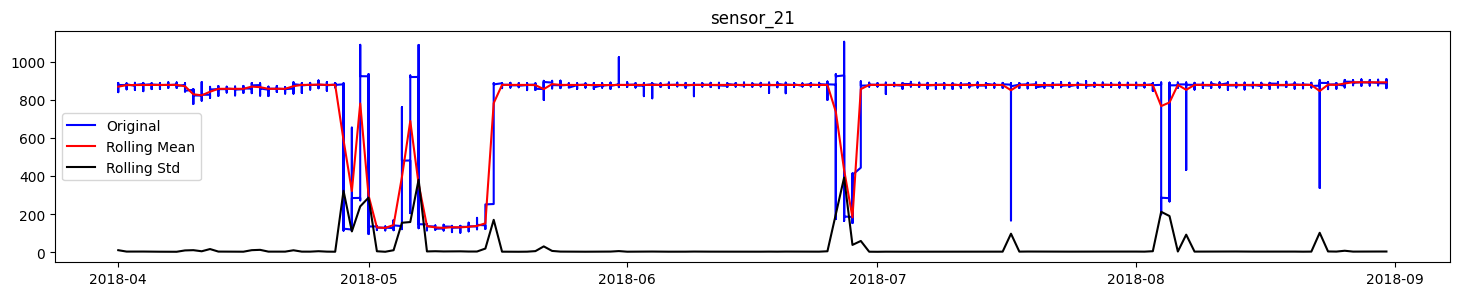

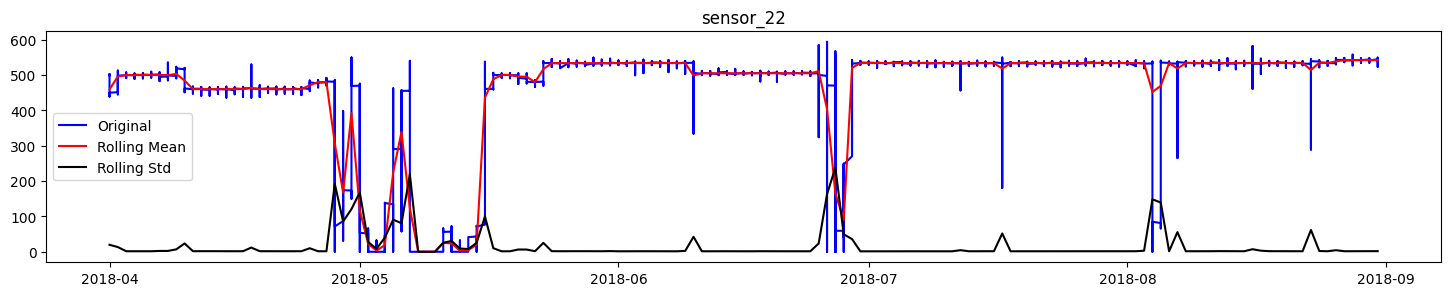

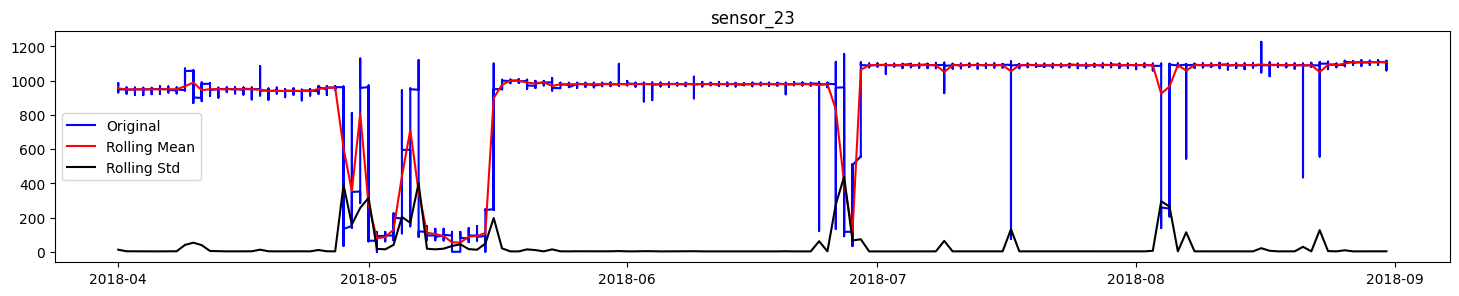

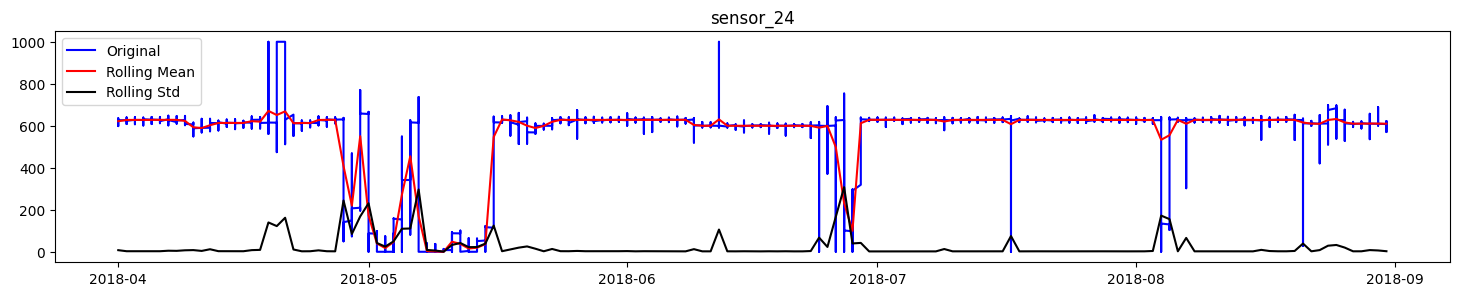

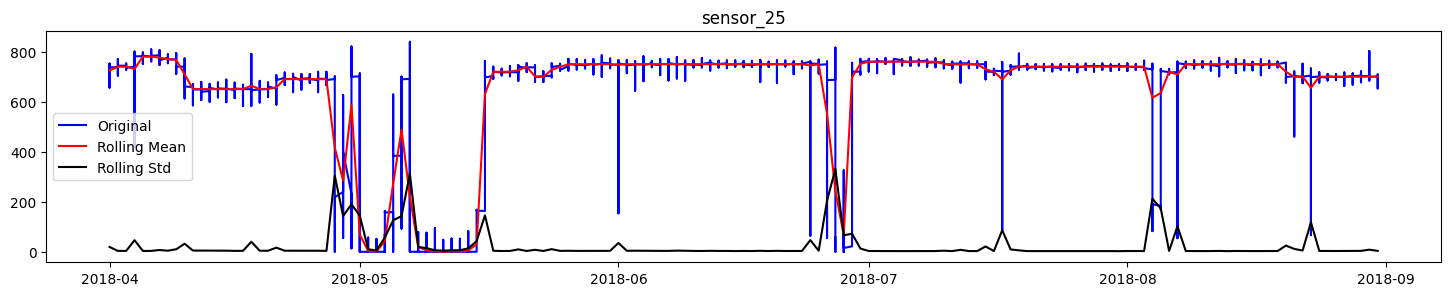

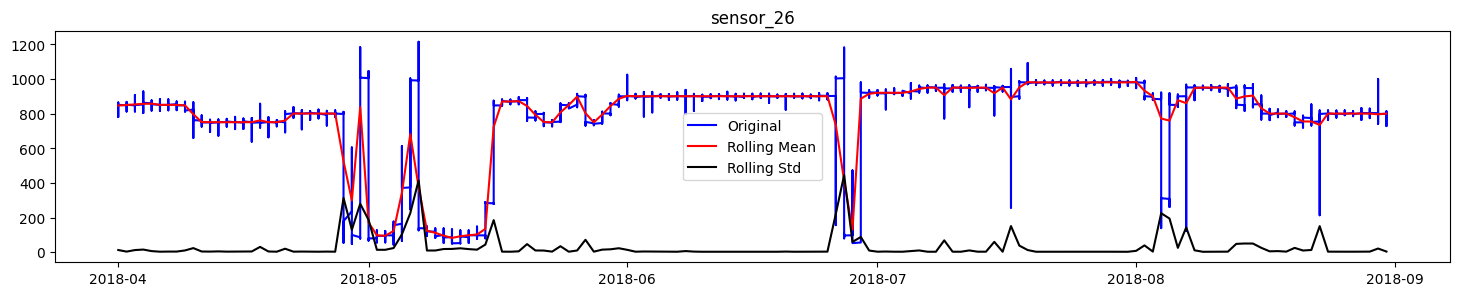

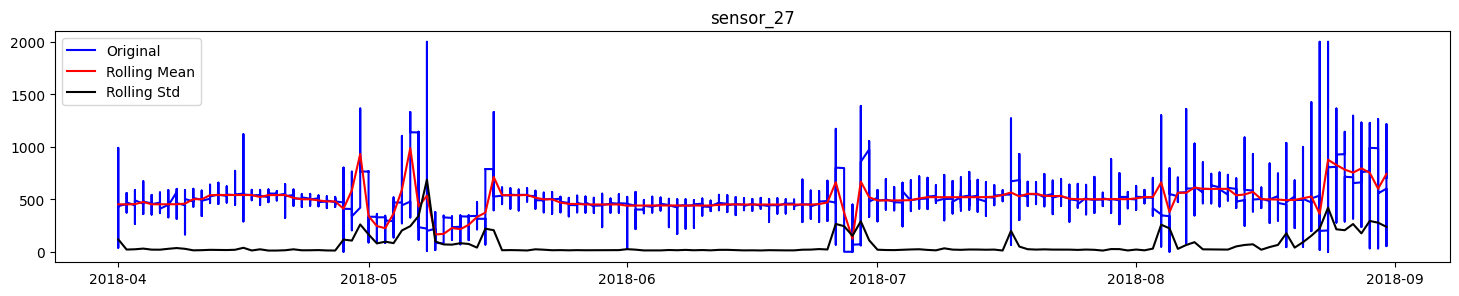

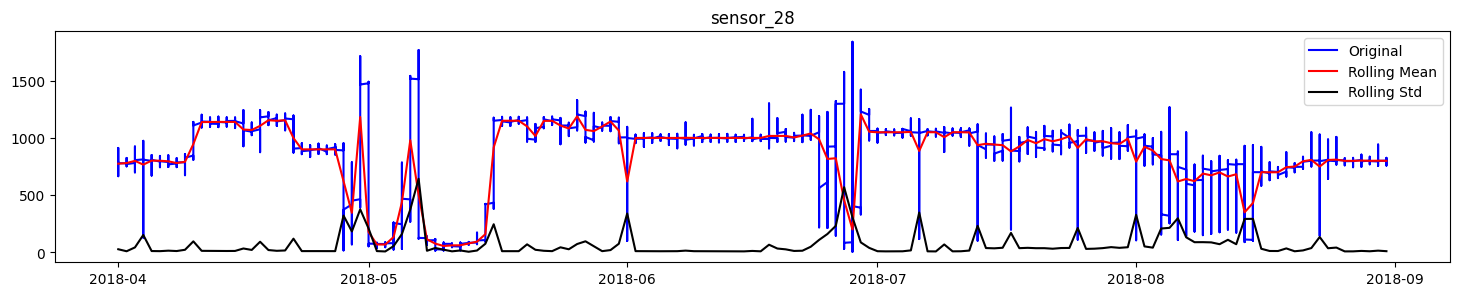

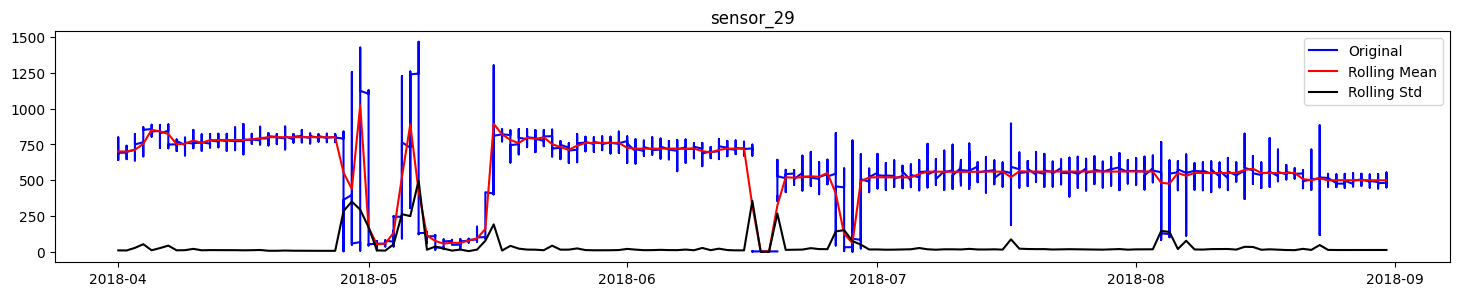

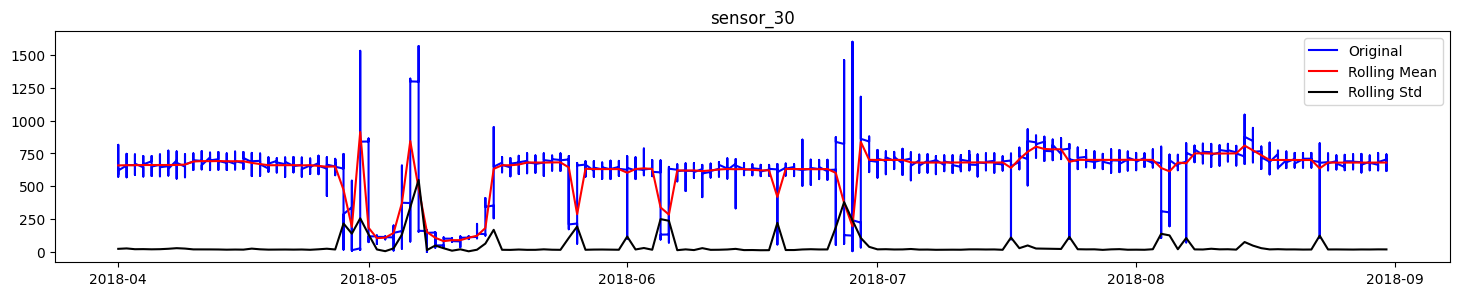

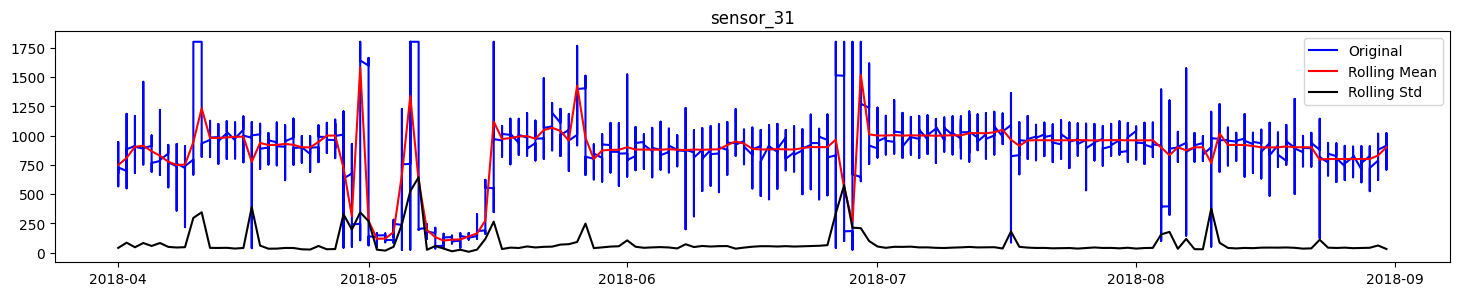

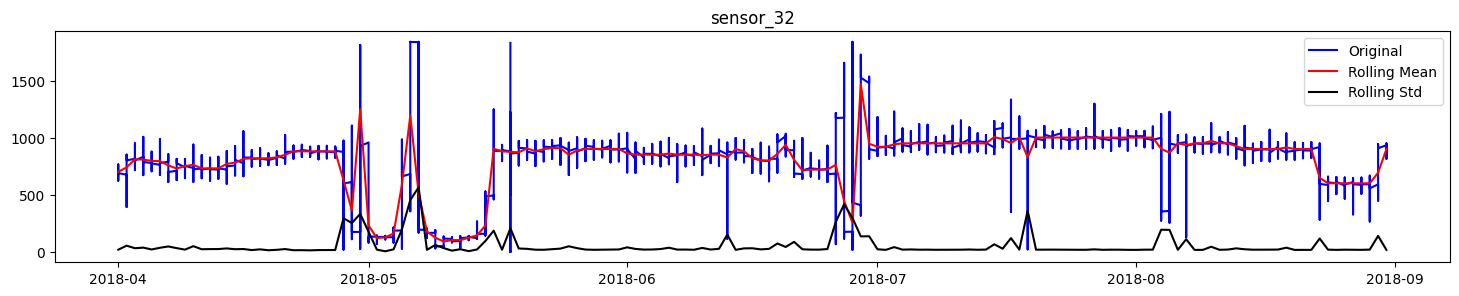

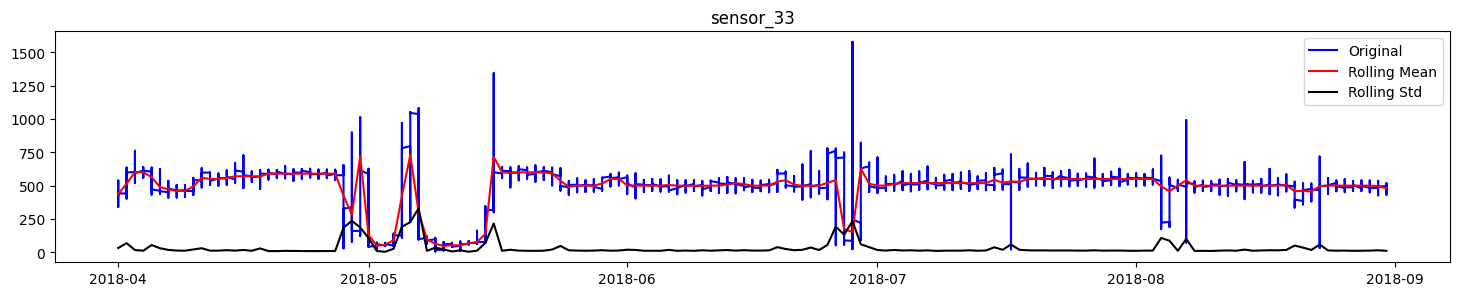

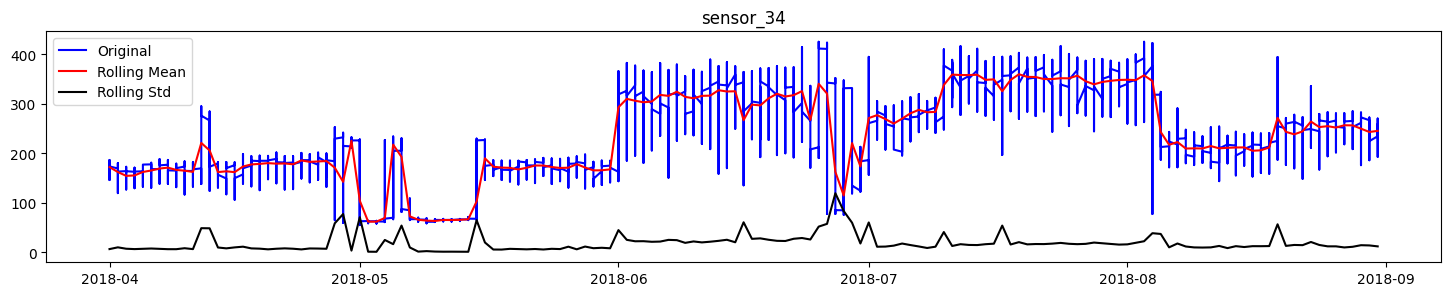

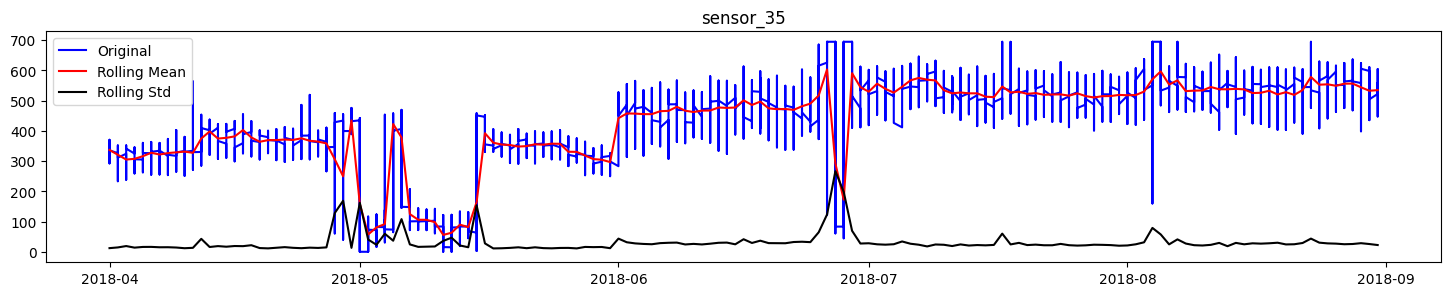

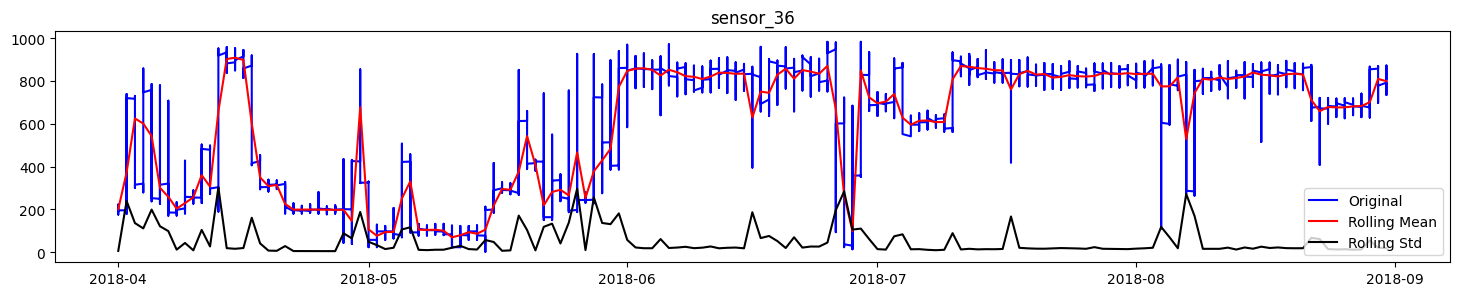

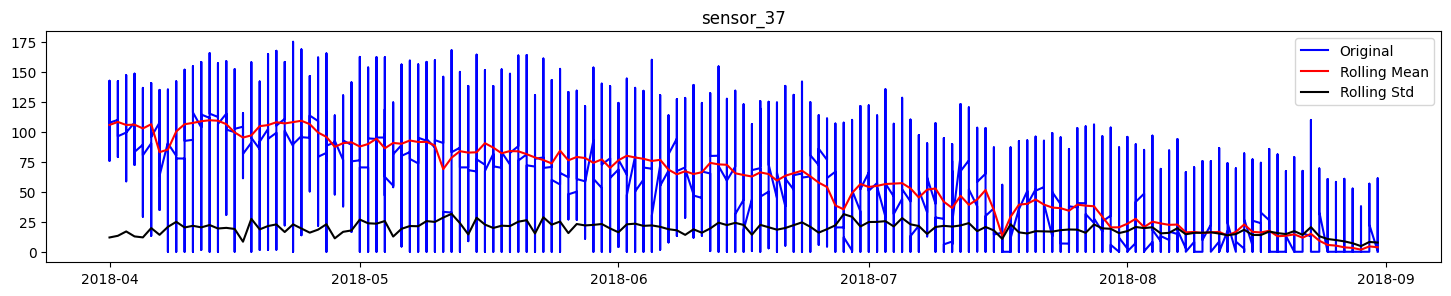

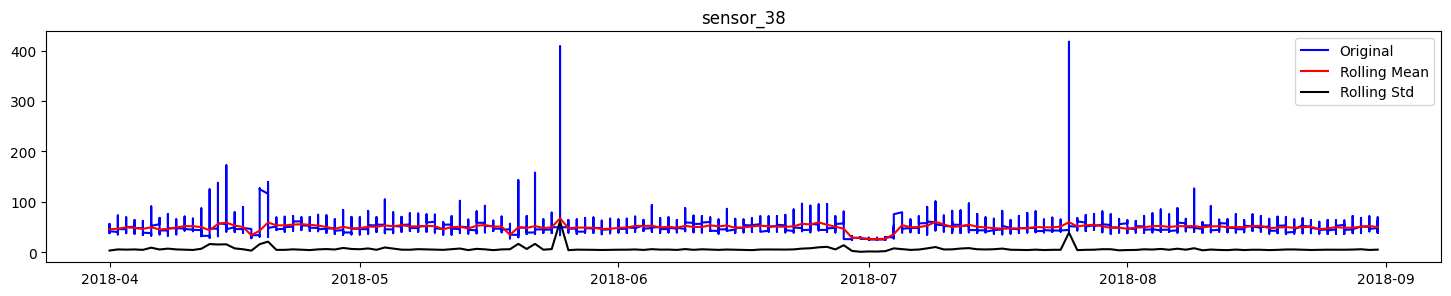

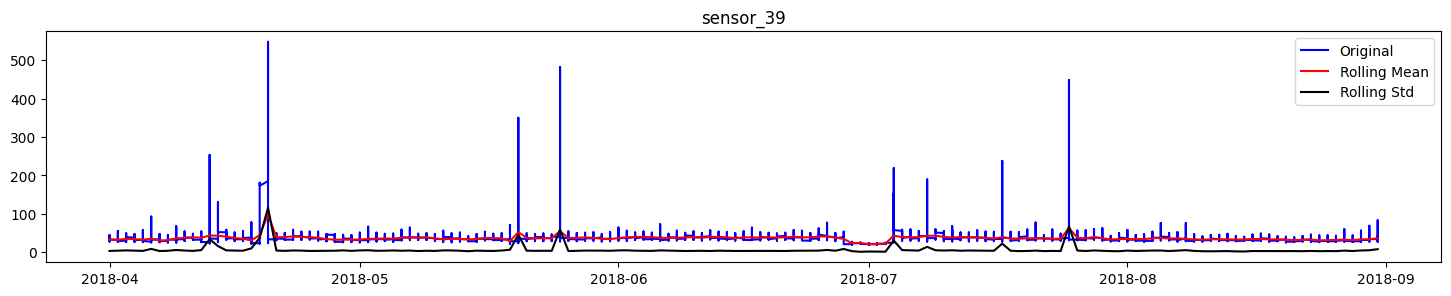

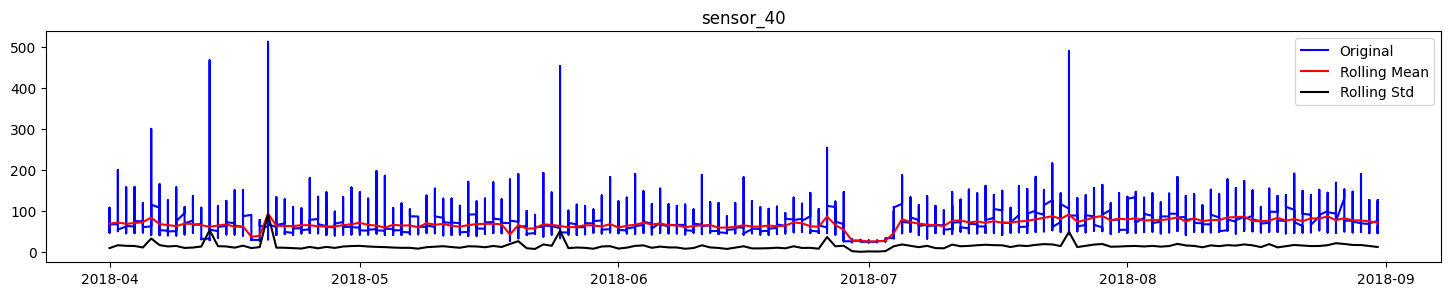

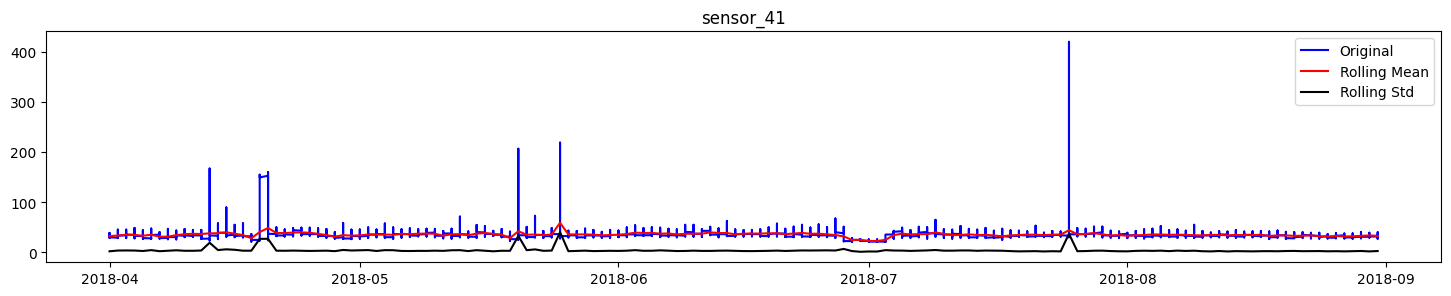

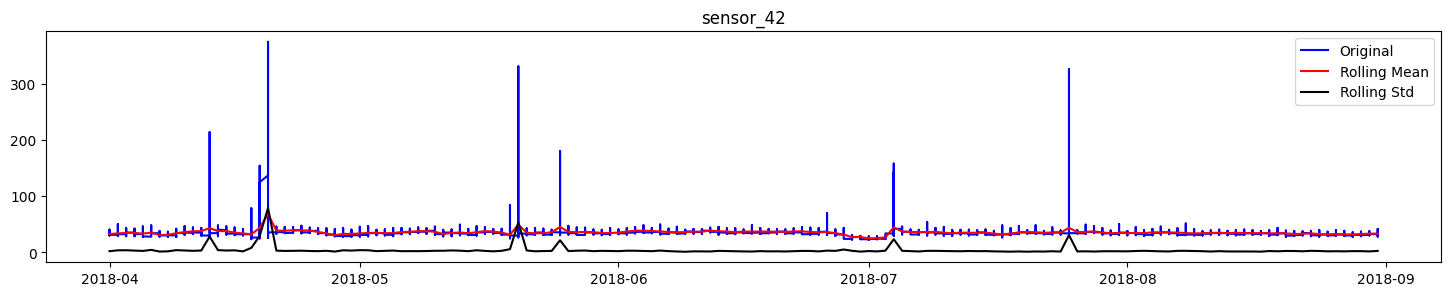

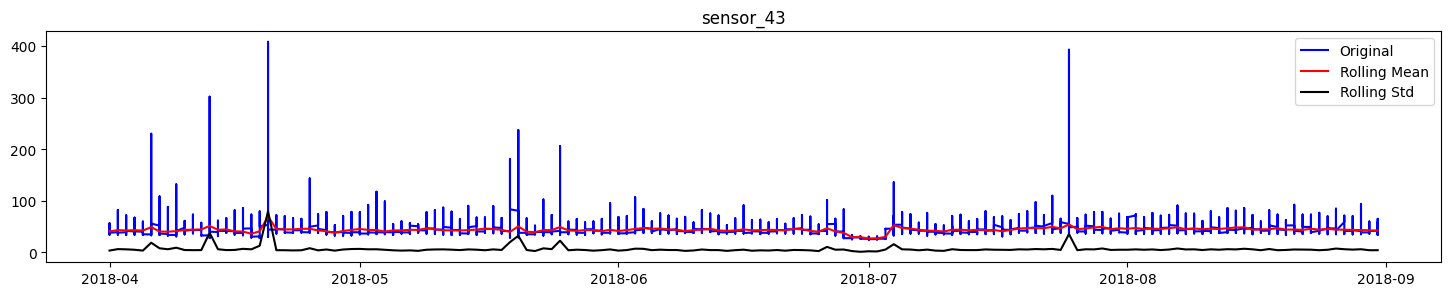

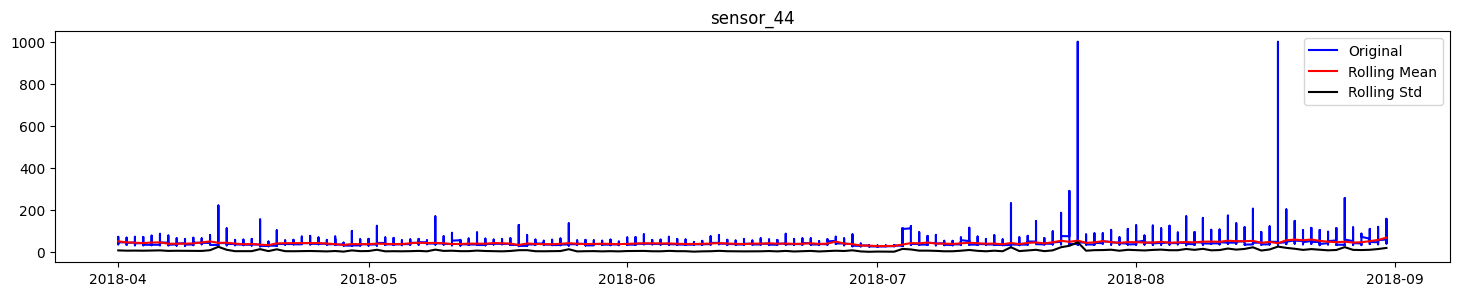

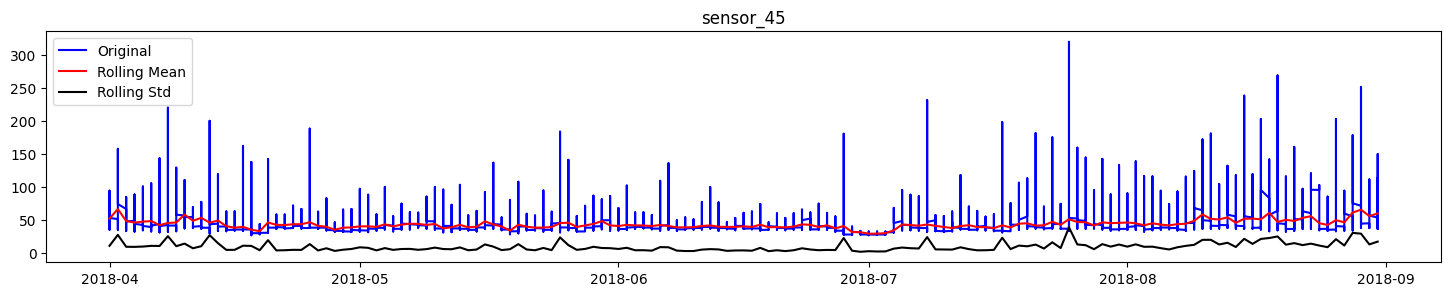

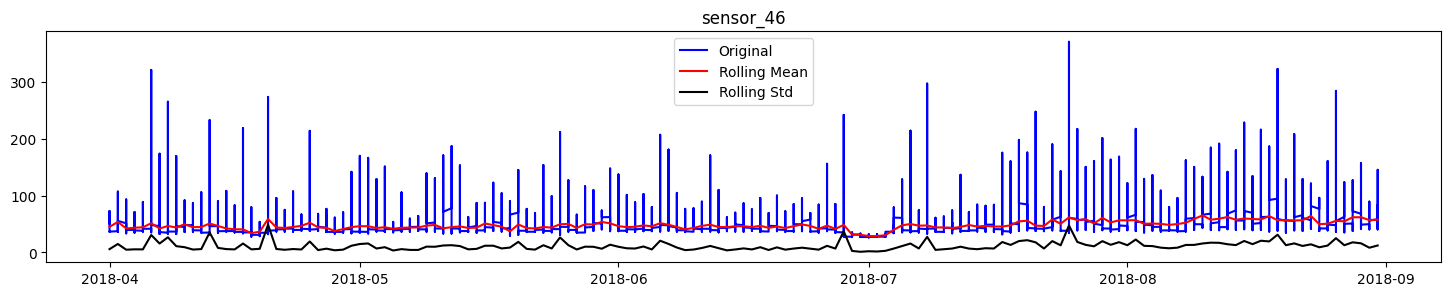

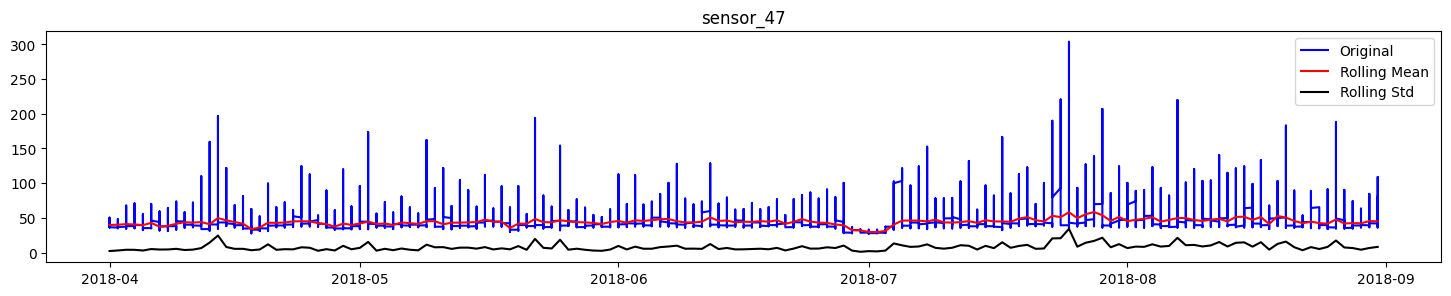

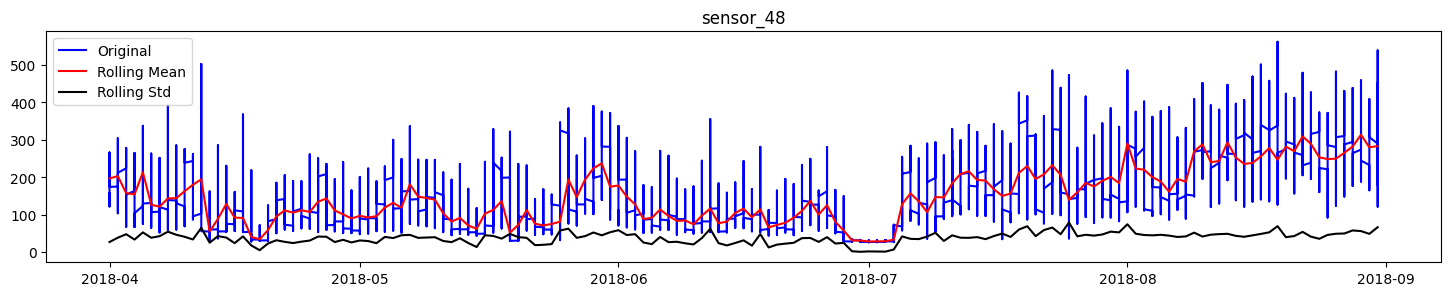

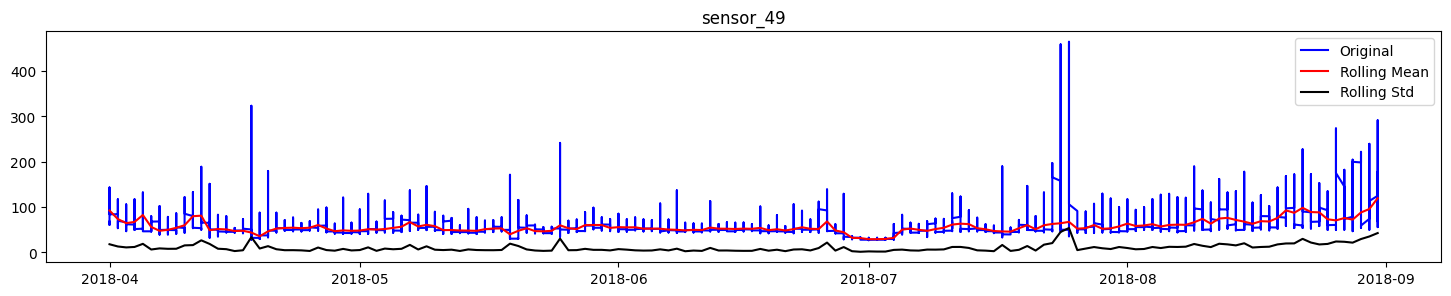

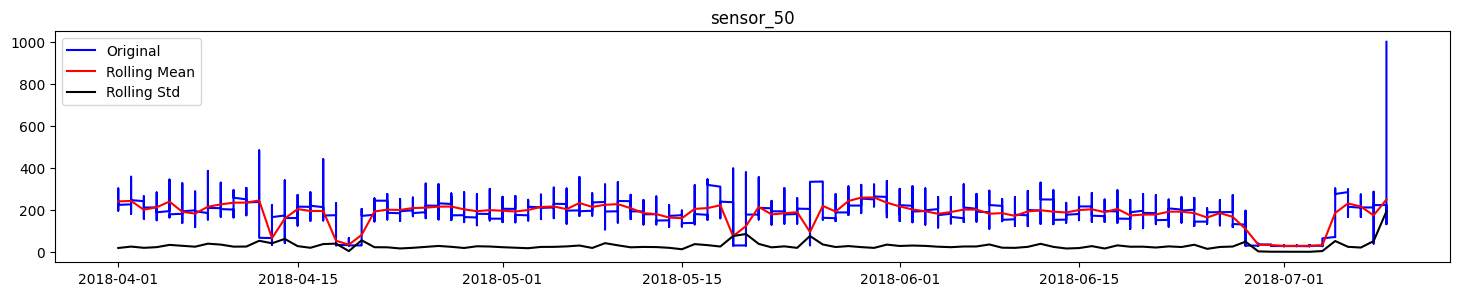

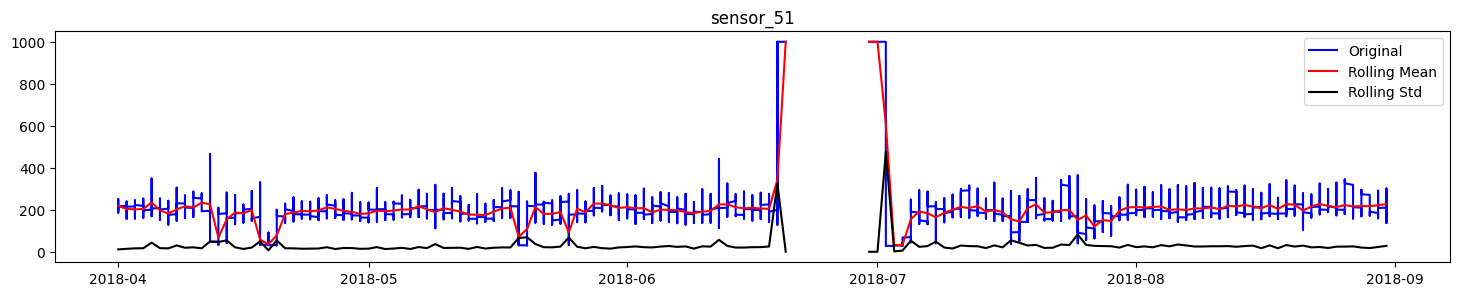

In [11]:
# Convert the 'date' column to a datetime data type
df['date'] = pd.to_datetime(df['date'])

# Set the 'date' column as the DataFrame's index
df.set_index('date', inplace=True)

# Resample the sensor columns by daily average
rollmean = df.loc[:, 'sensor_00':'sensor_51'].resample(rule='D').mean()
rollstd = df.loc[:, 'sensor_00':'sensor_51'].resample(rule='D').std()

# Plot time series for each sensor with its mean and standard deviation
for column in rollmean.columns:
    fig, ax = plt.subplots(figsize=(18, 3))
    ax.plot(df.index, df[column], color='blue', label='Original')
    ax.plot(rollmean.index, rollmean[column], color='red', label='Rolling Mean')
    ax.plot(rollstd.index, rollstd[column], color='black', label='Rolling Std')
    ax.legend(loc='best')
    ax.set_title(column)
    plt.show()

In [12]:
# Standardize/scale the dataset and apply PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

In [13]:
# Assuming 'df' is your DataFrame
missing_data = df.isna()

# Alternatively, you can use isnull() function
# missing_data = df.isnull()

# Check if any NaN values exist in the DataFrame
if missing_data.any().any():
    print("There are NaN values in the DataFrame.")
else:
    print("There are no NaN values in the DataFrame.")

# Optionally, you can count the number of NaN values in each column
nan_counts = missing_data.sum()
print(nan_counts)

There are NaN values in the DataFrame.
Unnamed: 0            0
sensor_00         10208
sensor_01           369
sensor_02            19
sensor_03            19
sensor_04            19
sensor_05            19
sensor_06          4798
sensor_07          5451
sensor_08          5107
sensor_09          4595
sensor_10            19
sensor_11            19
sensor_12            19
sensor_13            19
sensor_14            21
sensor_16            31
sensor_17            46
sensor_18            46
sensor_19            16
sensor_20            16
sensor_21            16
sensor_22            41
sensor_23            16
sensor_24            16
sensor_25            36
sensor_26            20
sensor_27            16
sensor_28            16
sensor_29            72
sensor_30           261
sensor_31            16
sensor_32            68
sensor_33            16
sensor_34            16
sensor_35            16
sensor_36            16
sensor_37            16
sensor_38            27
sensor_39            27
s

In [85]:
# Drop rows with NaN values
df_without_nan = df.dropna()
df_without_nan


Unnamed: 0  sensor_00  sensor_01  sensor_02  sensor_03  sensor_04  \
date                                                                            
2018-04-01           0   2.465394  47.092010   53.21180  46.310760   634.3750   
2018-04-01           1   2.465394  47.092010   53.21180  46.310760   634.3750   
2018-04-01           2   2.444734  47.352430   53.21180  46.397570   638.8889   
2018-04-01           3   2.460474  47.092010   53.16840  46.397568   628.1250   
2018-04-01           4   2.445718  47.135410   53.21180  46.397568   636.4583   
...                ...        ...        ...        ...        ...        ...   
2018-07-09      143319   2.474248  45.138885   51.86632  46.440970   636.5741   
2018-07-09      143320   2.476215  45.138890   51.86632  46.440971   621.7593   
2018-07-09      143321   2.468345  45.182290   51.82291  46.440971   626.2731   
2018-07-09      143322   2.479167  45.138890   51.86632  46.440971   631.9445   
2018-07-09      143323   2.466377  45.138885   51.86632  46.440971   630.9028   

            sensor_05  sensor_06  sensor_07  sensor_08  ...  sensor_43  \
date                                                    ...              
2018-04-01   76.45975   13.41146   16.13136   15.56713  ...   41.92708   
2018-04-01   76.45975   13.41146   16.13136   15.56713  ...   41.92708   
2018-04-01   73.54598   13.32465   16.03733   15.61777  ...   41.66666   
2018-04-01   76.98898   13.31742   16.24711   15.69734  ...   40.88541   
2018-04-01   76.58897   13.35359   16.21094   15.69734  ...   41.40625   
...               ...        ...        ...        ...  ...        ...   
2018-07-09   85.04365   13.77315   16.03733   15.18374  ...   43.48958   
2018-07-09   84.11448   13.89612   16.24711   15.45139  ...   44.79166   
2018-07-09   84.99566   13.92506   16.13136   15.37182  ...   45.83333   
2018-07-09   85.67138   13.78038   16.24711   14.96672  ...   46.61458   
2018-07-09   85.09058   13.84549   16.16753   14.98843  ...   46.87500   

            sensor_44  sensor_45  sensor_46  sensor_47  sensor_48  sensor_49  \
date                                                                           
2018-04-01  39.641200   65.68287   50.92593  38.194440   157.9861  67.708340   
2018-04-01  39.641200   65.68287   50.92593  38.194440   157.9861  67.708340   
2018-04-01  39.351852   65.39352   51.21528  38.194443   155.9606  67.129630   
2018-04-01  39.062500   64.81481   51.21528  38.194440   155.9606  66.840280   
2018-04-01  38.773150   65.10416   51.79398  38.773150   158.2755  66.550930   
...               ...        ...        ...        ...        ...        ...   
2018-07-09  39.641205   42.53472   58.44907  43.981480   169.8495  53.530094   
2018-07-09  39.641205   42.53472   57.87037  45.138890   169.8495  53.530094   
2018-07-09  39.641200   42.24537   56.42361  46.296300   167.8241  53.530094   
2018-07-09  40.219910   42.53472   54.97685  47.743060   162.6157  53.530094   
2018-07-09  40.798610   43.40278   53.53009  49.479170   158.8542  53.530090   

            sensor_50  sensor_51  machine_status  
date                                              
2018-04-01   243.0556   201.3889          NORMAL  
2018-04-01   243.0556   201.3889          NORMAL  
2018-04-01   241.3194   203.7037          NORMAL  
2018-04-01   240.4514   203.1250          NORMAL  
2018-04-01   242.1875   201.3889          NORMAL  
...               ...        ...             ...  
2018-07-09  1000.0000   202.8356          NORMAL  
2018-07-09  1000.0000   201.0995          NORMAL  
2018-07-09  1000.0000   200.8102          NORMAL  
2018-07-09  1000.0000   199.9421          NORMAL  
2018-07-09  1000.0000   199.3634          NORMAL  

[119103 rows x 53 columns]

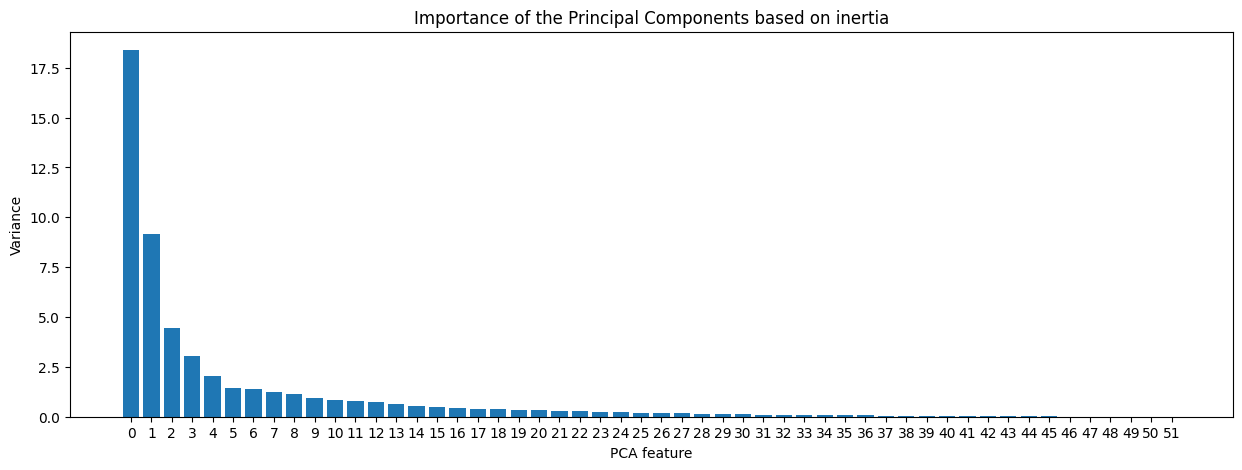

In [86]:
# Extract the names of the numerical columns
df2 = df_without_nan.drop(['machine_status'], axis=1)
names=df2.columns
x = df_without_nan[names]
scaler = StandardScaler()
pca = PCA()
pipeline = make_pipeline(scaler, pca)
pipeline.fit(x)
# Plot the principal components against their inertia
features = range(pca.n_components_)
plt.figure(figsize=(15, 5))
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('Variance')
plt.xticks(features)
plt.title("Importance of the Principal Components based on inertia")
plt.show()

In [90]:
# Calculate PCA with 2 components
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['pc1', 'pc2'])

In [93]:
from statsmodels.tsa.stattools import adfuller
# Run Augmented Dickey Fuller Test
result = adfuller(principalDf['pc1'])
# Print p-value
print(result[1])

0.9952098376585228


In [94]:
# Run Augmented Dickey Fuller Test
result2 = adfuller(principalDf['pc2'])
# Print p-value
print(result2[1])

0.03244346855192106


In [97]:
# Plot ACF
from statsmodels.graphics.tsaplots import plot_acf

# Plot ACF
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(pc1.dropna(), lags=20, alpha=0.05)

NameError: name 'pc1' is not defined

In [100]:
principalDf.head()

pc1         pc2  anomaly_pc1  anomaly_pc2
0 -64647.529922 -466.417099            0            0
1 -64646.529944 -466.412358            0            0
2 -64645.466174 -509.648948            0            0
3 -64644.464456 -512.768646            0            0
4 -64643.430750 -508.446203            0            0

In [106]:
# Calculate IQR for the 1st principal component (pc1)
q1_pc1, q3_pc1 = principalDf['pc1'].quantile([0.25, 0.75])
iqr_pc1 = q3_pc1 - q1_pc1
# Calculate upper and lower bounds for outlier for pc1
lower_pc1 = q1_pc1 - (1.5*iqr_pc1)
upper_pc1 = q3_pc1 + (1.5*iqr_pc1)
# Filter out the outliers from the pc1
principalDf['anomaly_pc1'] = ((principalDf['pc1']>upper_pc1) | (principalDf['pc1']<lower_pc1)).astype('int')
# Calculate IQR for the 2nd principal component (pc2)
q1_pc2, q3_pc2 = principalDf['pc2'].quantile([0.25, 0.75])
iqr_pc2 = q3_pc2 - q1_pc2
# Filter out the outliers from the pc2
df['anomaly_pc2'] = ((df['pc2']>upper_pc2) | (df['pc2']<lower_pc2)).astype('int')
# Let's plot the outliers from pc1 on top of the sensor_11 and see where they occured in the time series
a = df[df['anomaly_pc1'] == 1] #anomaly
_ = plt.figure(figsize=(18,6))
_ = plt.plot(df['sensor_11'], color='blue', label='Normal')
_ = plt.plot(a['sensor_11'], linestyle='none', marker='X', color='red', markersize=12, label='Anomaly')
_ = plt.xlabel('Date and Time')
_ = plt.ylabel('Sensor Reading')
_ = plt.title('Sensor_11 Anomalies')
_ = plt.legend(loc='best')
plt.show();

KeyError: 'pc2'

# Modeling

In [61]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch_geometric.nn import GCNConv
from torch_geometric.data import Data, DataLoader
import matplotlib.pyplot as pl

In [62]:

# Define the GNN model
class GNNModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(GNNModel, self).__init__()
        self.conv1 = GCNConv(input_dim, hidden_dim)
        self.conv2 = GCNConv(hidden_dim, output_dim)
        
    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = torch.relu(x)
        x = self.conv2(x, edge_index)
        return x

In [63]:
# Create the input tensors
x = torch.tensor(df_without_nan.drop(['Unnamed: 0', 'machine_status'], axis=1).values, dtype=torch.float32)
y = torch.tensor(df_without_nan['machine_status'].apply(lambda x: 1 if x == 'BROKEN' else 0).values, dtype=torch.float32)

In [64]:
# Create the graph structure
edge_index = torch.tensor([range(len(df_without_nan)-1), range(1, len(df_without_nan))], dtype=torch.long)

In [65]:
print("Shape of edge_index:", edge_index.shape)  # Output: torch.Size([2, 3])

Shape of edge_index: torch.Size([2, 119102])


In [76]:
print("shape of x :",x)

shape of x : tensor([[   2.4654,   47.0920,   53.2118,  ...,   67.7083,  243.0556,
          201.3889],
        [   2.4654,   47.0920,   53.2118,  ...,   67.7083,  243.0556,
          201.3889],
        [   2.4447,   47.3524,   53.2118,  ...,   67.1296,  241.3194,
          203.7037],
        ...,
        [   2.4683,   45.1823,   51.8229,  ...,   53.5301, 1000.0000,
          200.8102],
        [   2.4792,   45.1389,   51.8663,  ...,   53.5301, 1000.0000,
          199.9421],
        [   2.4664,   45.1389,   51.8663,  ...,   53.5301, 1000.0000,
          199.3634]])


In [67]:
# Create a Data object
data = Data(x=x, edge_index=edge_index, y=y)

In [71]:
# Split the data into training and testing sets
train_ratio = 0.8
train_size = int(train_ratio * len(df))
                 
train_data = Data(x=x[:train_size], edge_index=edge_index, y=y[:train_size])
train_loader = DataLoader([train_data], batch_size=1, shuffle=True)

test_data = Data(x=x[train_size:], edge_index=edge_index, y=y[train_size:])
test_loader = DataLoader([test_data], batch_size=1, shuffle=False)                 

In [72]:
# Initialize the GNN model
input_dim = x.shape[1]
hidden_dim = 64
output_dim = 1
model = GNNModel(input_dim, hidden_dim, output_dim)


In [73]:
# Define the loss function and optimizer
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [74]:
# Training loop
num_epochs = 10

for epoch in range(num_epochs):
    model.train()
    for data in train_loader:
        optimizer.zero_grad()
        out = model(data.x, data.edge_index)
        loss = criterion(out, data.y.view(-1, 1))
        loss.backward()
        optimizer.step()

In [75]:
# Step 4: Detect Anomalies
model.eval()
predictions = []
with torch.no_grad():
    for data in test_loader:
        out = model(data.x, data.edge_index)
        prediction = torch.sigmoid(out)  # Apply sigmoid activation for binary classification
        predictions.append(prediction.detach().numpy())

RuntimeError: index 1 is out of bounds for dimension 0 with size 0

In [ ]:
# Convert predictions back to tensors
prediction_tensors = [torch.from_numpy(pred) for pred in predictions]

# Plot the time series with anomalies marked
anomaly_indices = [i + train_size for i, pred in enumerate(prediction_tensors) if torch.any(pred > 0.5)]

In [60]:
# Find the indices of the top-k anomalies
k = 10  # Number of top anomalies to find
anomaly_scores = torch.cat(prediction_tensors).flatten()
top_anomaly_indices = torch.topk(anomaly_scores, k).indices

# Print the indices of the top anomalies
print(f'Top {k} Anomalies:')
for idx in top_anomaly_indices:
    print(f'- Data Point {idx.item()}')

# Get the corresponding data points for the top anomalies
top_anomaly_data = [test_data[idx.item()] for idx in top_anomaly_indices]

# Visualize the sensor readings for the top anomalies
for data in top_anomaly_data:
    sensor_readings = data.x.numpy()
    plt.plot(sensor_readings)
    plt.xlabel('Sensor')
    plt.ylabel('Sensor Reading')
    plt.title('Sensor Readings for Top Anomalies')
    plt.show()

RuntimeError: index 1 is out of bounds for dimension 0 with size 0

In [ ]:
# Plot the sensor readings with anomalies marked
names = df.columns[1:-1]  # Exclude 'Unnamed: 0' and 'machine_status'
for name in names:
    plt.figure(figsize=(18, 3))
    plt.plot(df[name], color='blue', label='Original')
    plt.scatter(anomaly_indices, df[name].iloc[anomaly_indices], color='red', marker='X', label='Anomaly')
    plt.title(name)
    plt.legend()
    plt.show()